In [1]:
import sys
sys.path.insert(0,'/mnt/ivy/thliao/project/ML_oxygen/scripts/')
from load_data import *
from general_func import *
from confounding_factors.taxon_related import *
%pylab inline
shap.initjs()
from IPython.display import Image,display

reduced_data = pd.read_csv('/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/keggbin_reduced.tsv',sep='\t',index_col=0)

8945
8943
(9328, 10054)
Counter({'aerobic': 3767, 'anaerobic': 1714, 'obligate aerobic': 1627, 'facultative': 953, 'microaerophilic': 726, 'obligate anaerobic': 156})
Populating the interactive namespace from numpy and matplotlib


In [24]:
sub_NCBI_df['metabolism'].unique()

array(['aerobic', 'anaerobic', 'facultative', 'microaerophilic',
       'obligate aerobic', 'obligate anaerobic'], dtype=object)

In [26]:
d = sub_NCBI_df.loc[(sub_NCBI_df['phylum']=='Proteobacteria') & (sub_NCBI_df['metabolism'].isin(['anaerobic','obligate anaerobic'])),:]

In [30]:
d = sub_NCBI_df.loc[(sub_NCBI_df['class']=='Deltaproteobacteria') & (sub_NCBI_df['metabolism'].isin(['anaerobic','obligate anaerobic'])),:]

In [2]:
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

In [3]:
odir = '/mnt/ivy/thliao/project/ML_oxygen/training_sets/outputs/taxa_specific_genes'
tax_map = {'Proteobacteria':"#0D47A1",
 'Firmicutes':"#ab63fa",
 'Actinobacteria':"#ef553b",
 'Bacteroidetes':"#ffa15a",
 "Alphaproteobacteria":"#90CAF9",  
 "Betaproteobacteria":"#2196F3",
 "Gammaproteobacteria":"#1976D2" }

In [4]:
ndata = get_ndata(reduced_data,y_bin)

# Predictions/validations for each taxon (using general model)

## test

In [4]:
d1,d2 = get_data(ndata,y_bin)
data1 = d1
data2 = d2
m_f = GBDT_m

In [35]:
    # y2 = data2['label']
    # c = data2.columns.difference(tids) # remove uncessary features
    # model = m_f(data2.loc[:,c], y2, X_test=None, y_test=None)
    # tax2auc = {}
    # tax2acc = {}
    # tax2confusion_matrix = {}
    # ds = []
    # for name,p in [('Actinobacteria','phylum'),
    #                ('Firmicutes','phylum'),
    #                ('Bacteroidetes','phylum'),
    #                ('Proteobacteria','phylum'),
    #                ('Alphaproteobacteria','class'),
    #                ('Betaproteobacteria','class'),
    #                ('Gammaproteobacteria','class')]:
    #     sub_data = data1.loc[data1[p]==name,:]
    #     sub_y = sub_data['label']
    #     sub_data = sub_data.loc[:,c]
    #     print(name,set(sub_y))
    #     num_s = sub_data.shape[0]
    #     if type(model) == xgb.Booster:
    #         sub_data = xgb.DMatrix(sub_data)
    #     if 'predict_proba' in dir(model):
    #         y_pred = model.predict_proba(sub_data)
    #         #auc = metrics.roc_auc_score(sub_y, y_pred[:, 1])
    #         #tax2auc[f"{name} ({sub_data.shape[0]})"] = auc
    #         #y_pred_label = model.predict(sub_data)
    #         print(y_pred)
    #     y_pred_label = model.predict(sub_data)
    #     # if len(set(y_pred_label))!=2:
    #     #     print(sub_y.values, y_pred_label)
    #     _d = pd.DataFrame(index=list(range(sub_y.shape[0])))
    #     _d.loc[:,'true'] = list(sub_y.values)
    #     _d.loc[:,'pred'] = y_pred_label
    #     _d.loc[:,'group'] = name
    #     ds.append(_d)
    # d = pd.concat(ds,axis=0)
    # with open(f'/mnt/ivy/thliao/project/ML_oxygen/scripts/confounding_factors/t.tsv','w') as f1:
    #     d.to_csv(f1,sep='\t',index=0)

Actinobacteria {0, 1}
Firmicutes {0, 1}
Bacteroidetes {0, 1}
Proteobacteria {0, 1}
Alphaproteobacteria {0, 1}
Betaproteobacteria {0, 1}
Gammaproteobacteria {0, 1}


In [ ]:

f1_score(y_true, y_pred_class)

## linearSVM (balanced accuracy)

In [7]:
ofile = join(odir,'LinearSVM_each_taxon_I100.tsv')
tax2auc_l = defaultdict(list)
tax2acc_l = defaultdict(list)
tax2AP_l = defaultdict(list)
for _ in tqdm(range(100)):
    d1,d2 = get_data(ndata,y_bin)
    tax2auc,tax2acc,tax2AP = validate_it(d1,d2,m_f=svmlinear_m)
    for p in tax2acc:
        tax2acc_l[p].append(tax2acc[p])
        if p in tax2auc:`
            tax2auc_l[p].append(tax2auc[p])
            tax2AP_l[p].append(tax2AP[p])
    break

  0%|          | 0/100 [00:02<?, ?it/s]


In [ ]:
d1,d2 = get_data(ndata,y_bin)
d1.shape,d2.shape

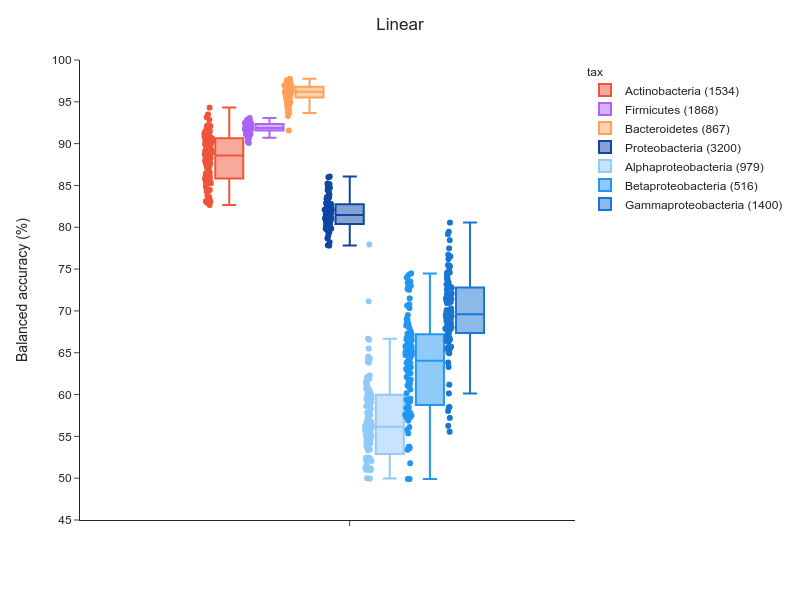

In [27]:
           
draw_df = gen_drawdf(tax2acc_l)
draw_df.loc[:,'values'] = draw_df['values'].astype(float)*100
fig = px.box(draw_df,y='values',color='tax',color_discrete_map=tax_map)
fig.update_traces(boxpoints='all')
for _ in fig.data:
    tax = _['name']
    n = int(draw_df.loc[draw_df['tax']==tax,'numbers'].astype(int).mean())
    _['name'] = f"{tax} ({n})"
fig.update_layout(width=800,height=600,yaxis_range=[45,100],
                 yaxis_tickmode='array',yaxis_tickvals = [_ for _ in range(45,101,5)],
                  yaxis_ticktext = [_ for _ in range(45,101,5)],
                  template='simple_white',
                  yaxis_title_text = 'Balanced accuracy (%)',title_x=0.5,
                  title_text='Linear'
                 )    

display(Image(fig.to_image()))
fig.write_image(join(odir,'LinearSVM_each_taxon_I100.pdf'))

## GBDT (balanced accuracy)

In [35]:
ofile = join(odir,'GBDT_each_taxon_I100.tsv')

f1 = open(ofile,'w')
f1.write(f"tax\tnumbers\tbalanced accuracy\tAUC\tAP\tround\n")
tax2auc_l = defaultdict(list)
tax2acc_l = defaultdict(list)
tax2AP_l = defaultdict(list)
for _ in tqdm(range(100)):
    d1,d2 = get_data(ndata,y_bin)
    tax2auc,tax2acc,tax2AP = validate_it(d1,d2,m_f=GBDT_m)
    for p in tax2acc:
        acc = tax2acc[p]
        tax2acc_l[p].append(acc)
        if p in tax2auc:
            auc = tax2auc[p]
            ap = tax2AP[p]
            tax2auc_l[p].append(auc)
            tax2AP_l[p].append(ap)
        else:
            auc = 'NA'
            ap = 'NA'
        tax = p.split(' ')[0]
        n = int(p.split('(')[-1].split(')')[0])
        f1.write(f"{tax}\t{n}\t{acc}\t{auc}\t{ap}\t{_}\n")
f1.close()
#draw_df = gen_drawdf(tax2acc_l)
# draw_df.to_csv(ofile,sep='\t',index=0)
# draw_df = pd.read_csv(ofile,sep='\t')


100%|██████████| 100/100 [04:14<00:00,  2.54s/it]


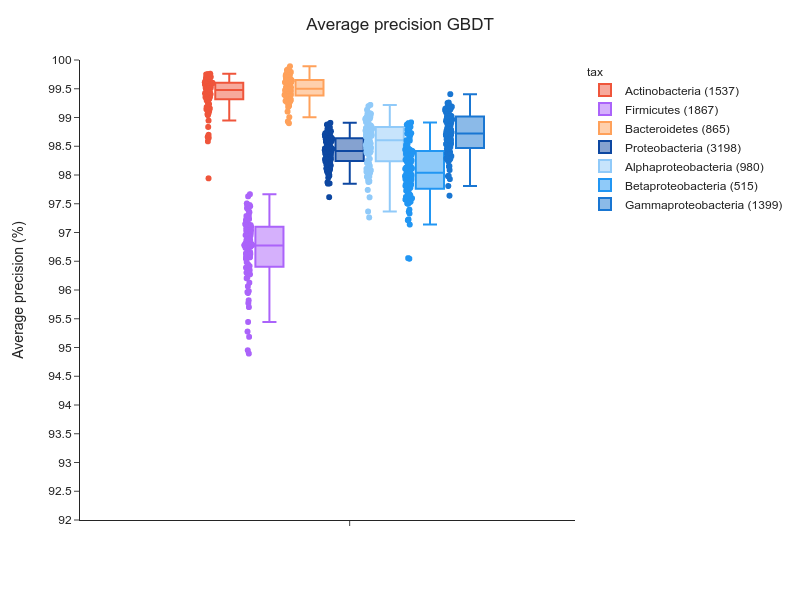

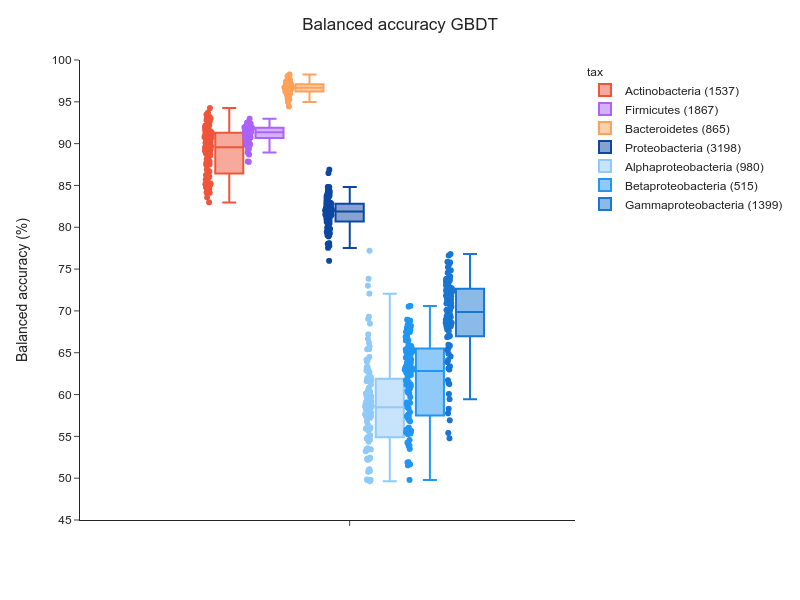

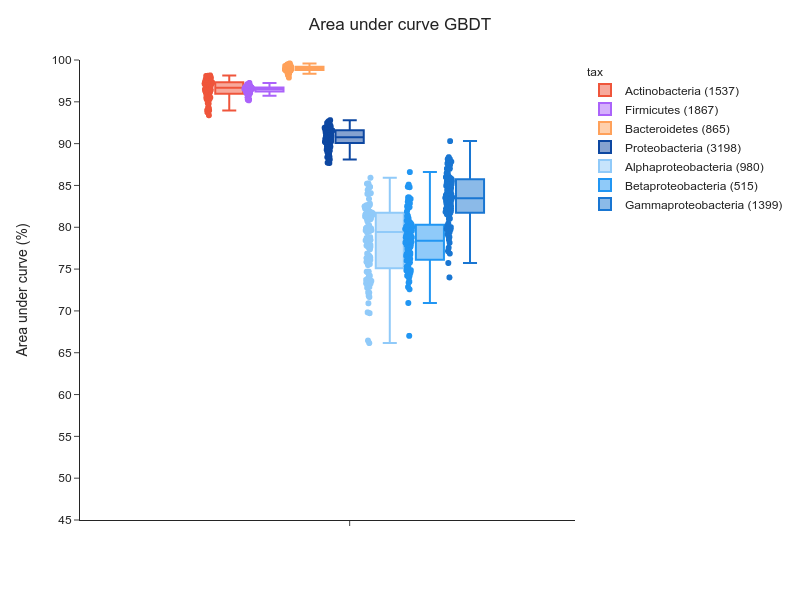

In [84]:
ofile = join(odir,'GBDT_each_taxon_I100.tsv')
for target_col,name,fn,yaxis_range,dtick in [('AP','Average precision','AP',(92,100),0.5),
                       ('balanced accuracy','Balanced accuracy','acc',(45,100),5),
                           ('AUC','Area under curve','AUC',(45,100),5),
                          ]:
    draw_df = pd.read_csv(ofile,sep='\t')
    #target_col = 'AP'
    draw_df.loc[:,target_col] = draw_df[target_col].astype(float)*100
    fig = px.box(draw_df,y=target_col,color='tax',color_discrete_map=tax_map)
    fig.update_traces(boxpoints='all')
    for _ in fig.data:
        tax = _['name']
        n = int(draw_df.loc[draw_df['tax']==tax,'numbers'].astype(int).mean())
        _['name'] = f"{tax} ({n})"
    fig.update_layout(width=800,height=600,yaxis_range=yaxis_range,
                     #yaxis_tickmode='array',
                      #,yaxis_tickvals = [_ for _ in range(45,101,5)],
                      #yaxis_ticktext = [_ for _ in range(45,101,5)],
                      yaxis_dtick=dtick,
                      template='simple_white',
                      yaxis_title_text = f'{name} (%)',title_x=0.5,
                      title_text=f'{name} GBDT'
                     )    
    display(Image(fig.to_image()))
    fig.write_image(join(odir,f'GBDT_each_taxon_I100{target_col}.pdf'))

## Logistic regression

In [34]:
ofile = join(odir,'LR_each_taxon_I100.tsv')

f1 = open(ofile,'w')
f1.write(f"tax\tnumbers\tbalanced accuracy\tAUC\tAP\tround\n")
tax2auc_l = defaultdict(list)
tax2acc_l = defaultdict(list)
tax2AP_l = defaultdict(list)
for _ in tqdm(range(100)):
    d1,d2 = get_data(ndata,y_bin)
    tax2auc,tax2acc,tax2AP = validate_it(d1,d2,m_f=LR_m_ll)
    for p in tax2acc:
        acc = tax2acc[p]
        tax2acc_l[p].append(acc)
        if p in tax2auc:
            auc = tax2auc[p]
            ap = tax2AP[p]
            tax2auc_l[p].append(auc)
            tax2AP_l[p].append(ap)
        else:
            auc = 'NA'
            ap = 'NA'
        tax = p.split(' ')[0]
        n = int(p.split('(')[-1].split(')')[0])
        f1.write(f"{tax}\t{n}\t{acc}\t{auc}\t{ap}\t{_}\n")
f1.close()

100%|██████████| 100/100 [04:43<00:00,  2.84s/it]


In [87]:
d2.shape

(895, 5816)

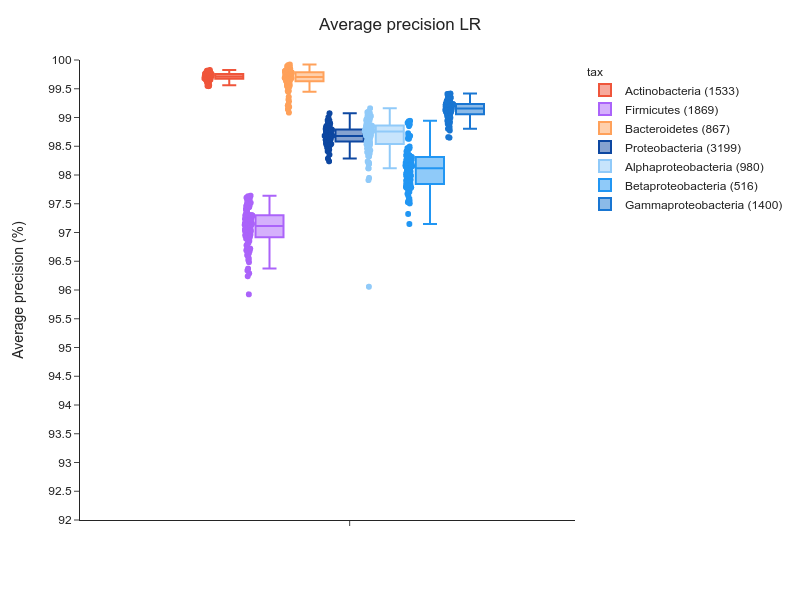

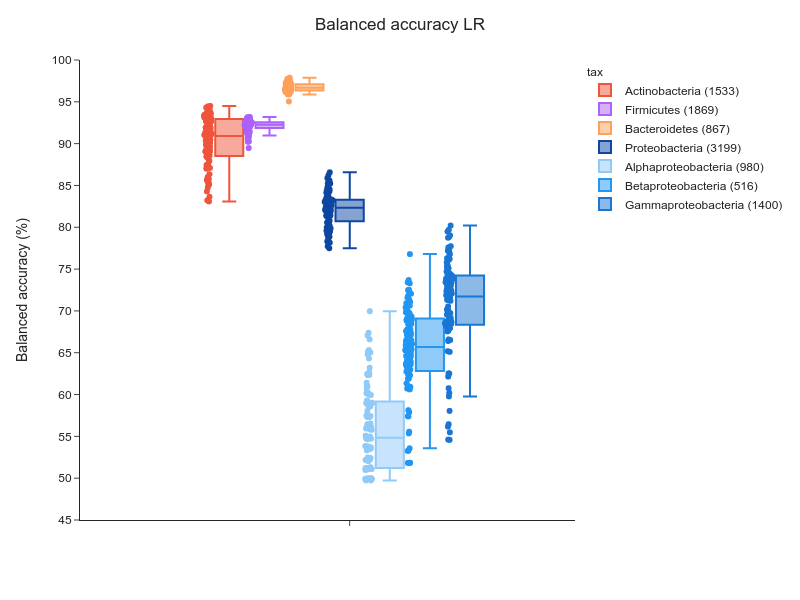

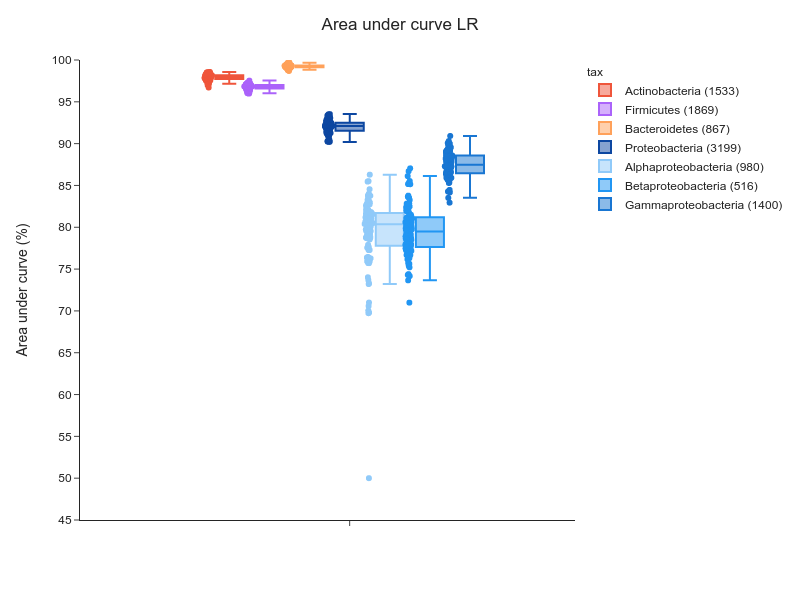

In [85]:
ofile = join(odir,'LR_each_taxon_I100.tsv')
for target_col,name,fn,yaxis_range,dtick in [('AP','Average precision','AP',(92,100),0.5),
                       ('balanced accuracy','Balanced accuracy','acc',(45,100),5),
                           ('AUC','Area under curve','AUC',(45,100),5),
                          ]:
    draw_df = pd.read_csv(ofile,sep='\t')
    #target_col = 'AP'
    draw_df.loc[:,target_col] = draw_df[target_col].astype(float)*100
    fig = px.box(draw_df,y=target_col,color='tax',color_discrete_map=tax_map)
    fig.update_traces(boxpoints='all')
    for _ in fig.data:
        tax = _['name']
        n = int(draw_df.loc[draw_df['tax']==tax,'numbers'].astype(int).mean())
        _['name'] = f"{tax} ({n})"
    fig.update_layout(width=800,height=600,yaxis_range=yaxis_range,
                     #yaxis_tickmode='array',
                      #,yaxis_tickvals = [_ for _ in range(45,101,5)],
                      #yaxis_ticktext = [_ for _ in range(45,101,5)],
                      yaxis_dtick=dtick,
                      template='simple_white',
                      yaxis_title_text = f'{name} (%)',title_x=0.5,
                      title_text=f'{name} LR'
                     )    
    display(Image(fig.to_image()))
    fig.write_image(join(odir,f'LR_each_taxon_I100{target_col}.pdf'))

## Linear 

In [ ]:

# # else:
# draw_df = pd.read_csv(ofile,sep='\t')
# draw_df.loc[:,'Balanced accuracy'] = draw_df['Balanced accuracy'].astype(float)*100
# fig = px.box(draw_df,y='Balanced accuracy',color='tax',color_discrete_map=tax_map)
# fig.update_traces(boxpoints='all')
# for _ in fig.data:
#     tax = _['name']
#     n = int(draw_df.loc[draw_df['tax']==tax,'numbers'].astype(int).mean())
#     _['name'] = f"{tax} ({n})"
# fig.update_layout(width=800,height=600,yaxis_range=[45,100],
#                  yaxis_tickmode='array',yaxis_tickvals = [_ for _ in range(45,101,5)],
#                   yaxis_ticktext = [_ for _ in range(45,101,5)],
#                   template='simple_white',
#                   yaxis_title_text = 'Balanced accuracy (%)',title_x=0.5,
#                   title_text='Linear'
#                  )    
# display(Image(fig.to_image()))
# fig.write_image(join(odir,'Linear_each_taxon_I100.pdf'))

In [ ]:
ofile = join(odir,'Linear_each_taxon_I100.tsv')

tax2auc_l = defaultdict(list)
tax2acc_l = defaultdict(list)
for _ in tqdm(range(100)):
    d1,d2 = get_data(ndata,y_bin)
    tax2auc,tax2acc = validate_it(d1,d2,m_f=linear_m)
    for p in tax2acc:
        tax2acc_l[p].append(tax2acc[p])
        if p in tax2auc:
            tax2auc_l[p].append(tax2auc[p])
acc_df = gen_drawdf(tax2acc_l).sort_values('tax')
auc_df = gen_drawdf(tax2auc_l).sort_values('tax')
draw_df = acc_df.copy()
draw_df.columns = ['tax','numbers','Balanced accuracy']
try:
    draw_df.loc[:,'AUC'] = list(auc_df['values'])
except:
    pass

draw_df.to_csv(ofile,sep='\t',index=0)

# else:
draw_df = pd.read_csv(ofile,sep='\t')
draw_df.loc[:,'Balanced accuracy'] = draw_df['Balanced accuracy'].astype(float)*100
fig = px.box(draw_df,y='Balanced accuracy',color='tax',color_discrete_map=tax_map)
fig.update_traces(boxpoints='all')
for _ in fig.data:
    tax = _['name']
    n = int(draw_df.loc[draw_df['tax']==tax,'numbers'].astype(int).mean())
    _['name'] = f"{tax} ({n})"
fig.update_layout(width=800,height=600,yaxis_range=[45,100],
                 yaxis_tickmode='array',yaxis_tickvals = [_ for _ in range(45,101,5)],
                  yaxis_ticktext = [_ for _ in range(45,101,5)],
                  template='simple_white',
                  yaxis_title_text = 'Balanced accuracy (%)',title_x=0.5,
                  title_text='Linear'
                 )    
display(Image(fig.to_image()))
fig.write_image(join(odir,'Linear_each_taxon_I100.pdf'))

## RF

In [76]:
ofile = join(odir,'RF_each_taxon_I100.tsv')

f1 = open(ofile,'w')
f1.write(f"tax\tnumbers\tbalanced accuracy\tAUC\tAP\tround\n")
tax2auc_l = defaultdict(list)
tax2acc_l = defaultdict(list)
tax2AP_l = defaultdict(list)
for _ in tqdm(range(100)):
    d1,d2 = get_data(ndata,y_bin)
    tax2auc,tax2acc,tax2AP = validate_it(d1,d2,m_f=RF_m)
    for p in tax2acc:
        acc = tax2acc[p]
        tax2acc_l[p].append(acc)
        if p in tax2auc:
            auc = tax2auc[p]
            ap = tax2AP[p]
            tax2auc_l[p].append(auc)
            tax2AP_l[p].append(ap)
        else:
            auc = 'NA'
            ap = 'NA'
        tax = p.split(' ')[0]
        n = int(p.split('(')[-1].split(')')[0])
        f1.write(f"{tax}\t{n}\t{acc}\t{auc}\t{ap}\t{_}\n")
f1.close()
#draw_df = gen_drawdf(tax2acc_l)
# draw_df.to_csv(ofile,sep='\t',index=0)
# draw_df = pd.read_csv(ofile,sep='\t')


  0%|          | 0/100 [00:00<?, ?it/s]

In [82]:
ofile

'/mnt/ivy/thliao/project/ML_oxygen/training_sets/outputs/taxa_specific_genes/RF_each_taxon_I100.tsv'

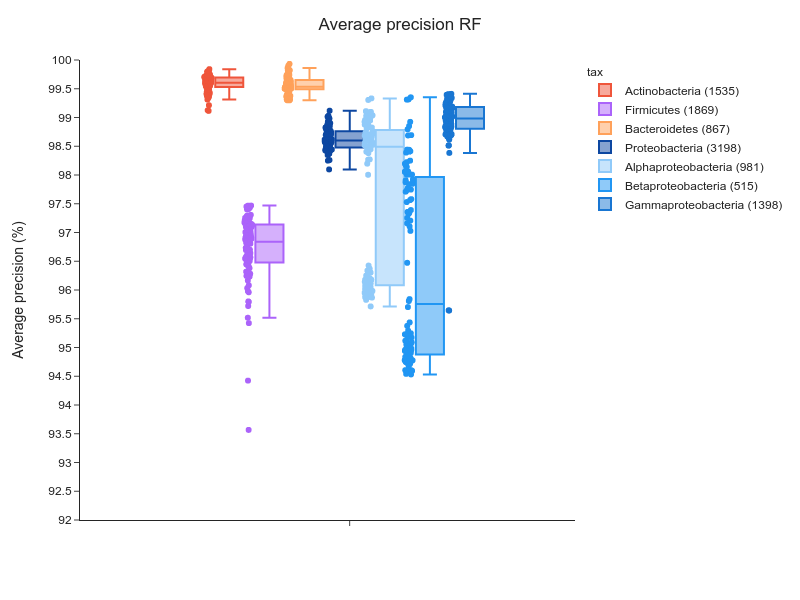

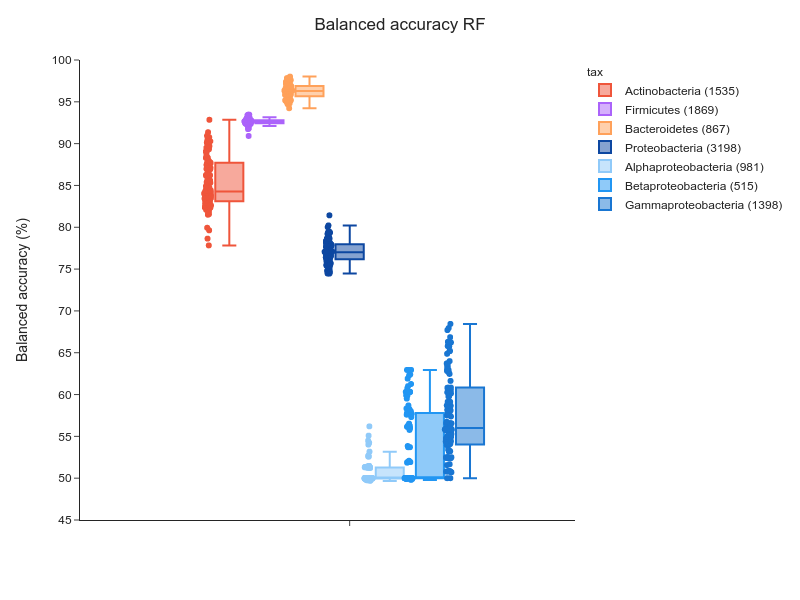

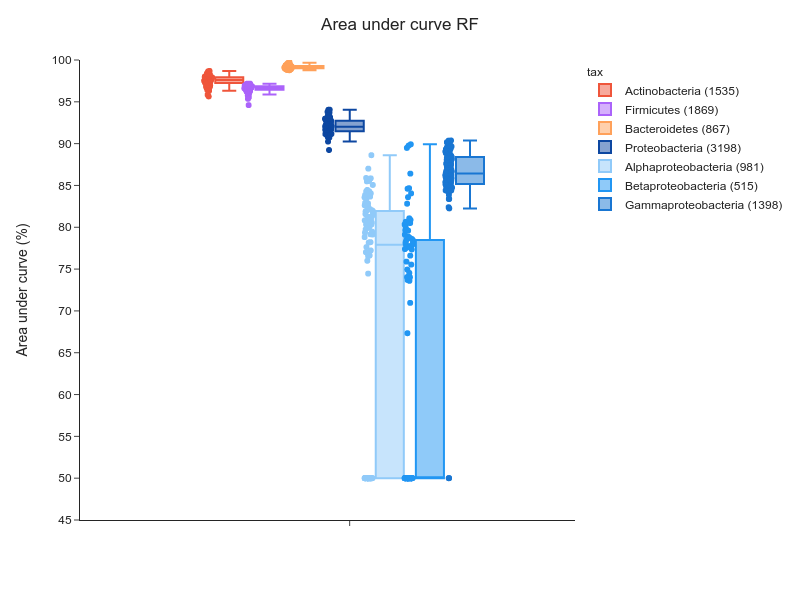

In [83]:
for target_col,name,fn,yaxis_range,dtick in [('AP','Average precision','AP',(92,100),0.5),
                       ('balanced accuracy','Balanced accuracy','acc',(45,100),5),
                           ('AUC','Area under curve','AUC',(45,100),5),
                          ]:
    draw_df = pd.read_csv(ofile,sep='\t')
    draw_df.loc[:,target_col] = draw_df[target_col].astype(float)*100
    fig = px.box(draw_df,y=target_col,color='tax',color_discrete_map=tax_map)
    fig.update_traces(boxpoints='all')
    for _ in fig.data:
        tax = _['name']
        n = int(draw_df.loc[draw_df['tax']==tax,'numbers'].astype(int).mean())
        _['name'] = f"{tax} ({n})"
    fig.update_layout(width=800,height=600,yaxis_range=yaxis_range,
                     #yaxis_tickmode='array',
                      #,yaxis_tickvals = [_ for _ in range(45,101,5)],
                      #yaxis_ticktext = [_ for _ in range(45,101,5)],
                      yaxis_dtick=dtick,
                      template='simple_white',
                      yaxis_title_text = f'{name} (%)',title_x=0.5,
                      title_text=f'{name} RF'
                     )    
    display(Image(fig.to_image()))
    fig.write_image(join(odir,f'RF_each_taxon_I100{target_col}.pdf'))

# prediction/validations in each taxon (using selected features)

In [69]:
import re
top50kos = [re.findall(f"K\d+",_)[0] for _ in open('/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/top50_2019.hal').read().strip().split('\n')]

used_data = bac_kegg_bin_df.loc[:,top50kos]
ndata = get_ndata(used_data,y_bin)
print(ndata.shape)

(8943, 59)


In [76]:
ofile = join(odir,'LR_each_taxon_I10_top50.tsv')
f1 = open(ofile,'w')
f1.write(f"tax\tnumbers\tbalanced accuracy\tAUC\tAP\tround\n")
tax2auc_l = defaultdict(list)
tax2acc_l = defaultdict(list)
tax2AP_l = defaultdict(list)
for _ in tqdm(range(10)):
    d1,d2 = get_data(ndata,y_bin)
    tax2auc,tax2acc,tax2AP = validate_it(d1,d2,m_f=GBDT_m)
    for p in tax2acc:
        acc = tax2acc[p]
        tax2acc_l[p].append(acc)
        if p in tax2auc:
            auc = tax2auc[p]
            ap = tax2AP[p]
            tax2auc_l[p].append(auc)
            tax2AP_l[p].append(ap)
        else:
            auc = 'NA'
            ap = 'NA'
        tax = p.split(' ')[0]
        n = int(p.split('(')[-1].split(')')[0])
        f1.write(f"{tax}\t{n}\t{acc}\t{auc}\t{ap}\t{_}\n")
f1.close()

  0%|          | 0/10 [00:00<?, ?it/s]

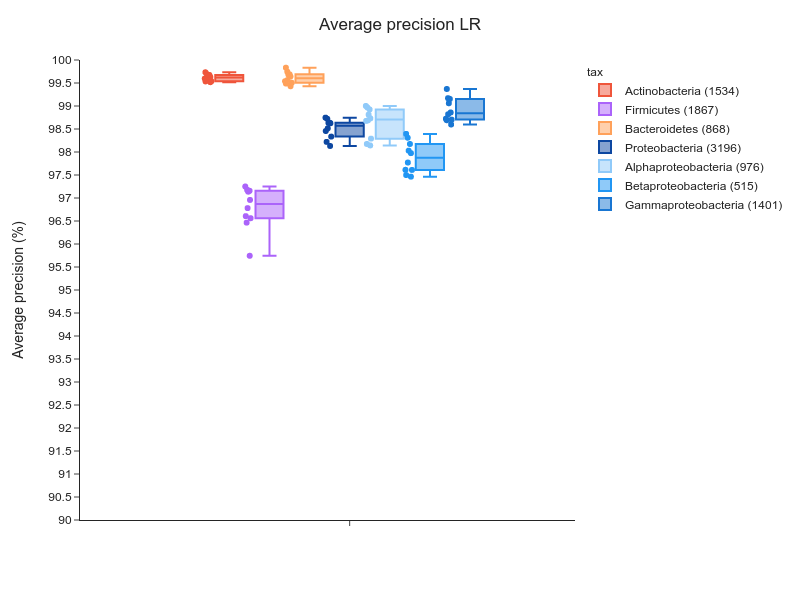

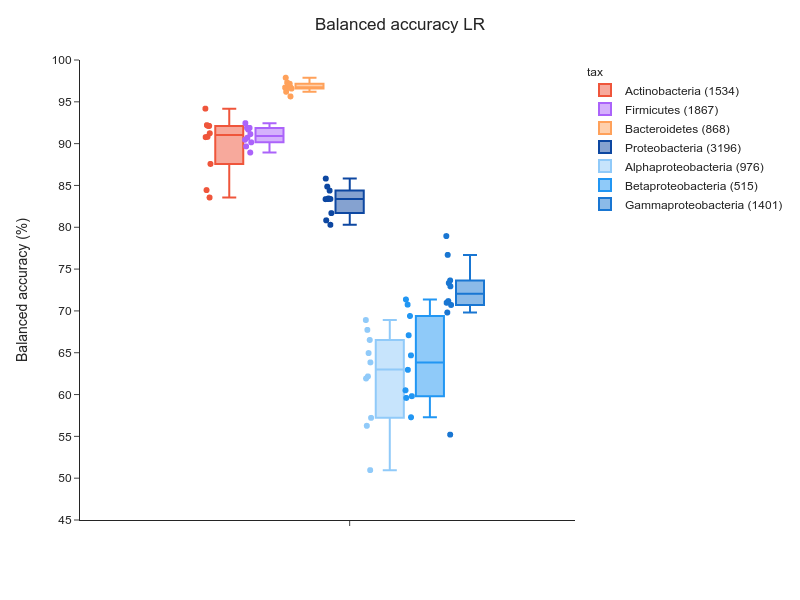

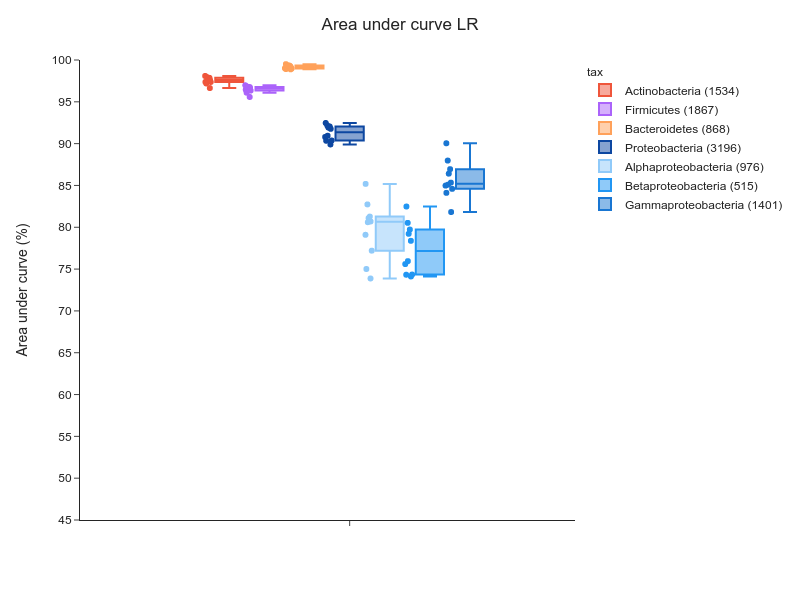

In [78]:
for target_col,name,fn,yaxis_range,dtick in [('AP','Average precision','AP',(90,100),0.5),
                       ('balanced accuracy','Balanced accuracy','acc',(45,100),5),
                           ('AUC','Area under curve','AUC',(45,100),5),
                          ]:
    draw_df = pd.read_csv(ofile,sep='\t')
    #target_col = 'AP'
    draw_df.loc[:,target_col] = draw_df[target_col].astype(float)*100
    fig = px.box(draw_df,y=target_col,color='tax',color_discrete_map=tax_map)
    fig.update_traces(boxpoints='all')
    for _ in fig.data:
        tax = _['name']
        n = int(draw_df.loc[draw_df['tax']==tax,'numbers'].astype(int).mean())
        _['name'] = f"{tax} ({n})"
    fig.update_layout(width=800,height=600,yaxis_range=yaxis_range,
                     #yaxis_tickmode='array',
                      #,yaxis_tickvals = [_ for _ in range(45,101,5)],
                      #yaxis_ticktext = [_ for _ in range(45,101,5)],
                      yaxis_dtick=dtick,
                      template='simple_white',
                      yaxis_title_text = f'{name} (%)',title_x=0.5,
                      title_text=f'{name} LR'
                     )    
    display(Image(fig.to_image()))
    #fig.write_image(join(odir,f'GBDT_each_taxon_I100{target_col}.pdf'))
    fig.write_image(join(odir,'LR_each_taxon_I10_top50.pdf'))

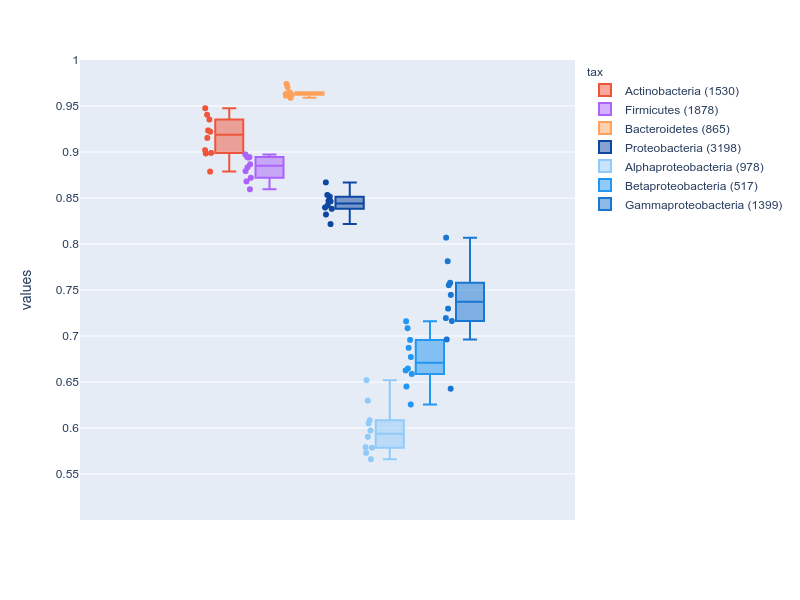

In [77]:
ofile = join(odir,'LR_each_taxon_I10_top50.tsv')
redo = False
#if not exists(ofile) or redo:
tax2auc_l = defaultdict(list)
tax2acc_l = defaultdict(list)
for _ in tqdm(range(10)):
    d1,d2 = get_data(ndata,y_bin)
    tax2auc,tax2acc = validate_it(d1,d2,m_f=LR_m_ll)
    for p in tax2acc:
        tax2acc_l[p].append(tax2acc[p])
        if p in tax2auc:
            tax2auc_l[p].append(tax2auc[p])
draw_df = gen_drawdf(tax2acc_l)
draw_df.to_csv(ofile,sep='\t',index=0)
#else:
draw_df = pd.read_csv(ofile,sep='\t')

fig = px.box(draw_df,y='values',color='tax',color_discrete_map=tax_map)
fig.update_traces(boxpoints='all')
for _ in fig.data:
    tax = _['name']
    n = int(draw_df.loc[draw_df['tax']==tax,'numbers'].astype(int).mean())
    _['name'] = f"{tax} ({n})"
fig.layout.width = 800
fig.layout.height = 600
fig.layout.yaxis.range = [0.5,1]
fig.layout.yaxis.tickmode='array'
fig.layout.yaxis.tickvals = [_/100 for _ in range(55,101,5)]
fig.layout.yaxis.ticktext = [_/100 for _ in range(55,101,5)]
display(Image(fig.to_image()))
fig.write_image(join(odir,'LR_each_taxon_I10_top50.pdf'))

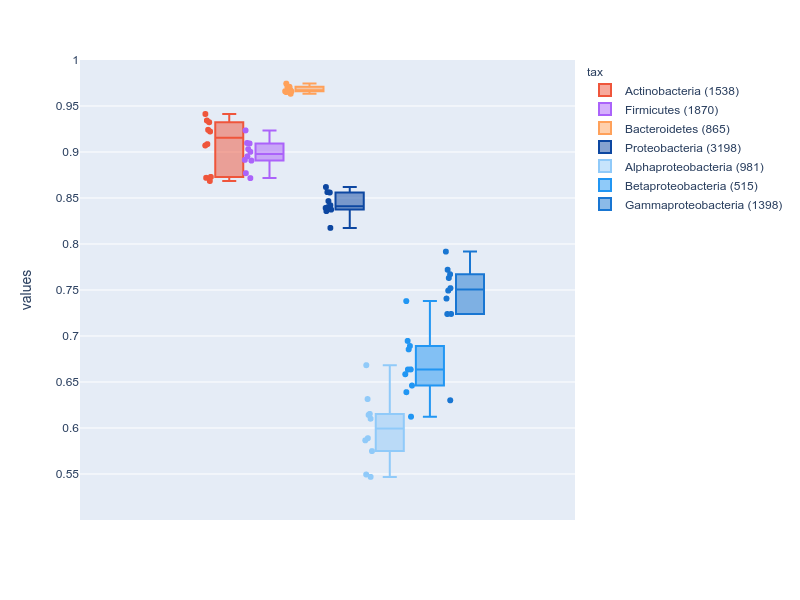

In [76]:
ofile = join(odir,'GBDT_each_taxon_I10_top50.tsv')
redo = False
if not exists(ofile) or redo:
    tax2auc_l = defaultdict(list)
    tax2acc_l = defaultdict(list)
    for _ in tqdm(range(10)):
        d1,d2 = get_data(ndata,y_bin)
        tax2auc,tax2acc = validate_it(d1,d2,m_f=GBDT_m)
        for p in tax2acc:
            tax2acc_l[p].append(tax2acc[p])
            if p in tax2auc:
                tax2auc_l[p].append(tax2auc[p])
    draw_df = gen_drawdf(tax2acc_l)
    draw_df.to_csv(ofile,sep='\t',index=0)
else:
    draw_df = pd.read_csv(ofile,sep='\t')

fig = px.box(draw_df,y='values',color='tax',color_discrete_map=tax_map)
fig.update_traces(boxpoints='all')
for _ in fig.data:
    tax = _['name']
    n = int(draw_df.loc[draw_df['tax']==tax,'numbers'].astype(int).mean())
    _['name'] = f"{tax} ({n})"
fig.layout.width = 800
fig.layout.height = 600
fig.layout.yaxis.range = [0.5,1]
fig.layout.yaxis.tickmode='array'
fig.layout.yaxis.tickvals = [_/100 for _ in range(55,101,5)]
fig.layout.yaxis.ticktext = [_/100 for _ in range(55,101,5)]
display(Image(fig.to_image()))
fig.write_image(join(odir,'GBDT_each_taxon_I10_top50.pdf'))

---

# Using four phyla

## function

In [66]:
from tkinter import Label
from PyPDF2 import PdfFileReader, PdfFileWriter, PdfFileMerger
from PyPDF2.pdf import PageObject
from decimal import Decimal
import io,os
from pdf2image import convert_from_path

def out_four(figs, ofile=None,figsize=200):
    figs_pdf = []
    for fig in figs:
        r = PdfFileReader(io.BytesIO(fig.to_image('pdf')))
        figs_pdf.append(r.getPage(0))
    if len(figs_pdf) == 4:
        w = figs_pdf[0].mediaBox.getWidth()
        h = figs_pdf[0].mediaBox.getHeight()
        aw = 2*w - Decimal(0.2)*w
        ah = 2*h - Decimal(0.2)*h
        translated_page = PageObject.createBlankPage(None, aw, ah)
        # mergeScaledTranslatedPage(page2, rotation, tx, ty, expand=True)
        translated_page.mergeScaledTranslatedPage(figs_pdf[0], 1, 0, Decimal(0.8)*h)  
        translated_page.mergeScaledTranslatedPage(figs_pdf[1], 1, Decimal(0.8)*w, Decimal(0.8)*h)  
        translated_page.mergeScaledTranslatedPage(figs_pdf[2], 1, 0, 0)  
        translated_page.mergeScaledTranslatedPage(figs_pdf[3], 1, Decimal(0.8)*w, 0)  
    elif len(figs_pdf) == 6:
        w = figs_pdf[0].mediaBox.getWidth()
        h = figs_pdf[0].mediaBox.getHeight()
        aw = 2*w - Decimal(0.2)*w
        ah = 3*h - Decimal(0.4)*h
        translated_page = PageObject.createBlankPage(None, aw, ah)
        # mergeScaledTranslatedPage(page2, rotation, tx, ty, expand=True)
        translated_page.mergeScaledTranslatedPage(figs_pdf[0], 1, 0, Decimal(1.6)*h)  
        translated_page.mergeScaledTranslatedPage(figs_pdf[1], 1, Decimal(0.8)*w, Decimal(1.6)*h)  
        translated_page.mergeScaledTranslatedPage(figs_pdf[2], 1, 0, Decimal(0.8)*h)  
        translated_page.mergeScaledTranslatedPage(figs_pdf[3], 1, Decimal(0.8)*w, Decimal(0.8)*h)  
        translated_page.mergeScaledTranslatedPage(figs_pdf[4], 1, 0, 0)  
        translated_page.mergeScaledTranslatedPage(figs_pdf[5], 1, Decimal(0.8)*w, 0)     
    pdf_write = PdfFileWriter()
    pdf_write.addPage(translated_page)
    if ofile is None:
        ofile = './tmp.pdf'
        with open(ofile, 'wb') as fh:
            pdf_write.write(fh)
        pages = convert_from_path(ofile, figsize)
        os.system(f"rm {ofile}")
        pages[0].save('./tmp.png','PNG')
        
        bytes_fig = open('./tmp.png','rb').read()
        os.system(f"rm ./tmp.png")
        return bytes_fig
    else:
        with open(ofile, 'wb') as fh:
            pdf_write.write(fh)

# taxon-specifci modeling
from collections import defaultdict, Counter
from sklearn import metrics
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, StratifiedShuffleSplit
from tqdm.notebook import trange,tqdm
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler
        
def batch_get_pearsonr(x_df, y):
    fea2coef = {}
    fea2p = {}
    for col_name, col in x_df.iteritems():
        slope, p = pearsonr(col, y)
        fea2coef[col_name] = slope
        fea2p[col_name] = p
    fea2q = dict(zip([fea for fea, p in fea2p.items()],
                     multipletests([_p for _fea, _p in fea2p.items()],
                                   method='fdr_bh')[1]))
    fea2pearsonr = {f: (fea2coef[f], q) for f, q in fea2q.items()}
    return fea2pearsonr


def two_way_stratifiedshufflesplit(X, y,
                                   groups, total_size=500, target_g=[],
                                   y_balance_type='same'):
    tmp_df = X.copy()
    tmp_df.loc[:, 'label'] = y

    each_size = [total_size//len(target_g)]*len(target_g)
    if sum(each_size) != total_size:
        each_size = each_size[:-1]
        each_size.append(total_size-sum(each_size))
    if y_balance_type == 'same':
        label1_ratio = Counter(y)[1]/len(y)
    else:
        pass

    taxa2genomes = defaultdict(list)
    for taxa, size in zip(target_g, each_size):
        sub_X = tmp_df.loc[groups == taxa, :]
        sub_X1 = sub_X.loc[sub_X['label'] == 1, :]
        sub_X0 = sub_X.loc[sub_X['label'] == 0, :]

        s1 = int(size*label1_ratio)
        s0 = size - s1
        if s1 > sub_X1.shape[0]:
            print(f"1 samples have {sub_X1.shape[0]}. but we want {s1}")
            s1 = sub_X1.shape[0]
        if s0 > sub_X0.shape[0]:
            print(f"0 samples have {sub_X0.shape[0]}. but we want {s0}")
            s0 = sub_X0.shape[0]
        taxa2genomes[taxa] += list(sub_X1.sample(n=s1).index)
        taxa2genomes[taxa] += list(sub_X0.sample(n=s0).index)
    return taxa2genomes

def set_type(y_true,y_pred):
    a = []
    for yt,yp in zip(y_true,y_pred):
        if yt == 1 and yp == yt:
            a.append('tp')
        elif yt == 0 and yp == yt:
            a.append('tn')
        elif yt == 0 and yp != yt:
            a.append('fn')
        elif yt == 1 and yp != yt:
            a.append('fp')
    return a

class taxa_sep_workflow():
    def __init__(self, X, y, idx2tax, study_taxa, model_f):
        self.X = X.copy()
        self.y = y
        self.idx2tax = idx2tax

        self.taxaSpecM2otherTaxa = defaultdict(list)
        self.taxaSpecM2specificTaxa = defaultdict(list)
        self.AllTaxaM2otherTaxa = defaultdict(list)
        self.AllTaxaM2specificTaxa = defaultdict(list)

        self.taxaSpecM2otherTaxa_samples = defaultdict(lambda: defaultdict(list))
        self.taxaSpecM2specificTaxa_samples = defaultdict(lambda: defaultdict(list))
        self.AllTaxaM2otherTaxa_samples = defaultdict(lambda: defaultdict(list))
        self.AllTaxaM2specificTaxa_samples = defaultdict(lambda: defaultdict(list))

        # self.taxon2specific_feas = defaultdict(list)
        # self.taxon2others_feas = defaultdict(list)

        self.model_f = model_f

        self.study_taxa = study_taxa[::]

        self.MODEL_TaxaSpec = {}
        self.TEST_TaxaOther = {}
        self.TEST_TaxaSpec = {}

        self.TRAIN_TaxaSpec = {}
        self.SHAP_taxaSpecM2otherTaxa = defaultdict(list)
        self.SHAP_taxaSpecM2specificTaxa = defaultdict(list)
        self.DIRE_taxaSpecM2otherTaxa = defaultdict(list)
        self.DIRE_taxaSpecM2specificTaxa = defaultdict(list)
        
    def get_data(self):
        data = self.X
        data.loc[:, 'tax'] = [self.idx2tax[_] for _ in data.index]
        data.loc[:, 'label'] = self.y
        return data

    def get_equal_size(self, total_size, length_group):
        each_size = [total_size//length_group]*length_group
        if sum(each_size) != total_size:
            each_size = each_size[:-1]
            each_size.append(total_size-sum(each_size))
        return each_size

    def sampling_based_on_tax(self, data, total_size, target_g, label_balance_type='same'):
        y = data['label']
        each_size = self.get_equal_size(total_size, len(target_g))

        tax2genomes = defaultdict(list)
        for taxa, size in zip(target_g, each_size):
            sub_X = data.loc[data['tax'] == taxa, :]
            sub_X1 = sub_X.loc[sub_X['label'] == 1, :]
            sub_X0 = sub_X.loc[sub_X['label'] == 0, :]
            if type(label_balance_type) == float:
                label1_ratio = label_balance_type
            elif label_balance_type == 'same':
                label1_ratio = sub_X1.shape[0]/sub_X.shape[0]
            else:
                print(label_balance_type,type(label_balance_type))
                
            s1 = int(size*label1_ratio)
            s0 = size - s1
            if s1 > sub_X1.shape[0]:
                # if it can't maintain the label balanced. we could take all
                # or, use another `label_balance_type` to perform resampling
                print(f"1 samples have {sub_X1.shape[0]}. but we want {s1}")
                s1 = sub_X1.shape[0]
            if s0 > sub_X0.shape[0]:
                print(f"0 samples have {sub_X0.shape[0]}. but we want {s0}")
                s0 = sub_X0.shape[0]
            tax2genomes[taxa] += list(sub_X1.sample(n=s1).index)
            tax2genomes[taxa] += list(sub_X0.sample(n=s0).index)
        all_genomes = [_ for v in tax2genomes.values() for _ in v]
        return tax2genomes, all_genomes

    def _train(self,data):
        try:
            in_m = self.model_f()
            in_m.fit(data.iloc[:, :-2], data['label'])
        except:
            in_m = self.model_f(data.iloc[:, :-2], data['label'])
        return in_m
    
    def oversampling_data(self,data):
        dfs = []
        for tax,sub_df in data.groupby('tax'):
            smote = SMOTE(k_neighbors=2)
            X_res, y_res = smote.fit_resample(sub_df.iloc[:,:-2].astype(int),sub_df['label'])
            X_res.loc[:,'tax'] = tax
            X_res.loc[:,'label'] = y_res
            dfs.append(X_res)
        df = pd.concat(dfs,axis=0)
        return df
    
    def get_overall_model(self, train_size=500,oversampling=False):
        """
        Contribute a MixedTaxa-training model and the remaining dataset

        Args:
            train_size (int, optional): _description_. Defaults to 500.
            target_taxa (list, optional): _description_. Defaults to [].
        """
        data = self.get_data()
        data = data.loc[data['tax'].isin(self.study_taxa)]
        l1_ratio = float(sum(data['label']==1)/data.shape[0])
        tax2genomes, all_genomes = self.sampling_based_on_tax(data, 
                                                              total_size=train_size, target_g=self.study_taxa,label_balance_type=l1_ratio)

        MERGED_data = data.loc[all_genomes,:]
        if oversampling:
            MERGED_data = self.oversampling_data(MERGED_data)
            
        self.TRAIN_Merged = MERGED_data
        REMAIN_data = data.loc[data.index.difference(set(all_genomes)),:]
        # REMAIN_data = self.oversampling_data(REMAIN_data)
        self.REMAIN_data = REMAIN_data

        AllTaxaM = self._train(MERGED_data)
        # AllTaxaM.fit(MERGED_data.iloc[:, :-2], MERGED_data['label'])
        self.MODEL_AllTaxa = AllTaxaM
        
    def get_taxaOther_data(self, train_size=500, target_taxa=''):
        other_taxa = self.study_taxa[::]
        other_taxa.remove(target_taxa)

        data = self.REMAIN_data
        TaxaOther_data = data.loc[data['tax'].isin(other_taxa),:]
        
        tax2genomes, all_genomes = self.sampling_based_on_tax(TaxaOther_data,
                                                              total_size=train_size,
                                                              target_g=other_taxa,)
        
        self.TEST_TaxaOther[target_taxa] = TaxaOther_data.loc[all_genomes,:]

    def get_taxaSpec_model(self, train_size=500, target_taxa='',oversampling=False):
        """
        Contribute a TaxaSpec-training model and two dataset (taxaSpecic and OtherTaxa)

        Args:
            train_size (int, optional): _description_. Defaults to 500.
            target_taxa (list, optional): _description_. Defaults to ''.
        """
        data = self.REMAIN_data

        TaxaSepc_data = data.loc[data['tax'] == target_taxa,:]
        tax2genomes, all_genomes = self.sampling_based_on_tax(data,
                                                              total_size=train_size,
                                                              target_g=[target_taxa])
        TaxaSpec_Train = TaxaSepc_data.loc[all_genomes, :]
        TaxaSpec_Test = TaxaSepc_data.loc[TaxaSepc_data.index.difference(all_genomes), :]
        if oversampling:
            TaxaSpec_Train = self.oversampling_data(TaxaSpec_Train)
            
        TaxaSpecM = self._train(TaxaSpec_Train)
        #TaxaSpecM.fit(TaxaSpec_Train.iloc[:, :-2], TaxaSpec_Train['label'])

        self.MODEL_TaxaSpec[target_taxa] = TaxaSpecM
        self.TRAIN_TaxaSpec[target_taxa] = TaxaSpec_Train
        self.TEST_TaxaSpec[target_taxa] = TaxaSpec_Test
        
        self.get_taxaOther_data(train_size=train_size,target_taxa=target_taxa)
        
    def refresh_performance(self):
        self.taxaSpecM2otherTaxa = defaultdict(list)
        self.taxaSpecM2specificTaxa = defaultdict(list)
        self.AllTaxaM2otherTaxa = defaultdict(list)
        self.AllTaxaM2specificTaxa = defaultdict(list)
    
    def validating(self, taxa, eval='bacc'):
        if eval == 'bacc':
            def eval_f(model, data,): 
                if type(model) == xgb.Booster:
                    y_pred = model.predict(xgb.DMatrix(data.iloc[:,:-2]))
                    _d = (y_pred>0.5).astype(int)
                    _d = (data['label']==_d).astype(int).to_dict()
                    return _d,metrics.balanced_accuracy_score(data['label'], y_pred>0.5)
                else:
                    y_pred = model.predict(data.iloc[:,:-2])
                    _d = (data['label']==y_pred).astype(int).to_dict()
                    return _d,metrics.balanced_accuracy_score(data['label'], y_pred)
        elif eval.upper() == 'AUC':
            def eval_f(model, data,): 
                if type(model) == xgb.Booster:
                    y_pred = model.predict(xgb.DMatrix(data.iloc[:,:-2]))
                    return {}, metrics.roc_auc_score(data['label'], y_pred)
                else:
                    y_pred = model.predict_proba(data.iloc[:,:-2])
                    return {}, metrics.roc_auc_score(data['label'], y_pred[:,1])
        elif eval.upper() == 'AP':
            def eval_f(model, data,): 
                if type(model) == xgb.Booster:
                    y_pred = model.predict(xgb.DMatrix(data.iloc[:,:-2]))
                    return {}, metrics.roc_auc_score(data['label'], y_pred)
                else:
                    y_pred = model.predict_proba(data.iloc[:,:-2])
                    return {}, metrics.average_precision_score(data['label'], y_pred[:,1])
            
        taxaSpec_model = self.MODEL_TaxaSpec[taxa]
        taxaSpec_data = self.TEST_TaxaSpec[taxa]
        taxaOther_data = self.TEST_TaxaOther[taxa]
        
        # across tax
        s2CorW, _result = eval_f(taxaSpec_model,taxaOther_data)
        self.taxaSpecM2otherTaxa[taxa].append(_result)
        for k,v in s2CorW.items():
            self.taxaSpecM2otherTaxa_samples[taxa][k].append(v)
        # same tax
        s2CorW, _result = eval_f(taxaSpec_model, taxaSpec_data)
        self.taxaSpecM2specificTaxa[taxa].append(_result)
        for k,v in s2CorW.items():
            self.taxaSpecM2specificTaxa_samples[taxa][k].append(v)
        # overall model 2 across
        s2CorW, _result = eval_f(self.MODEL_AllTaxa, taxaOther_data)
        self.AllTaxaM2otherTaxa[taxa].append(_result)
        for k,v in s2CorW.items():
            self.AllTaxaM2otherTaxa_samples[taxa][k].append(v)        
        # overall model 2 same
        s2CorW, _result = eval_f(self.MODEL_AllTaxa, taxaSpec_data)
        self.AllTaxaM2specificTaxa[taxa].append(_result)
        for k,v in s2CorW.items():
            self.AllTaxaM2specificTaxa_samples[taxa][k].append(v)        
            
    def data_info(self,data):
        info_data = data.groupby(['tax','label']).size().to_dict()
        return info_data
    
    def get_info(self):
        #
        for taxon in self.study_taxa:    
            print(self.data_info(self.TEST_TaxaSpec[taxon]))
            print(self.data_info(self.TEST_TaxaOther[taxon]))

        pass

    def get_shap(self,model,data,y_l):
        if type(model) == RandomForestClassifier :
            explainer = shap.TreeExplainer(model, data)
            shap_values = explainer.shap_values(data)
            shap_value = shap_values[1]
        elif type(model) == xgb.Booster:
            explainer = shap.TreeExplainer(model)
            d = xgb.DMatrix(data,label=y_l)
            shap_values = explainer.shap_values(d)
            shap_value = shap_values
        else:
            explainer = shap.Explainer(model, data)
            shap_value = explainer.shap_values(data)
            
        t = np.mean(np.abs(shap_value), 0) / \
            np.mean(np.abs(shap_value), 0).sum() * 100
        ko2imp = dict(zip(data.columns, t))
        
        # see the direction
        l1_sP_ratios = (shap_value[y_l==1,:]>0).sum(0)/sum(y_l==1) *100
        ko2l1_sP_ratios = dict(zip(data.columns[:-2],
                                l1_sP_ratios))
        return ko2imp,ko2l1_sP_ratios
    
    def run(self, repeat_times=5, 
            train_size=500, 
            eval='bacc',oversampling=True,
            return_shap=False):
        
        for t in tqdm(range(repeat_times),desc='first loop'):
            # init the overall model and the remaining dataset
            self.get_overall_model(train_size=train_size,oversampling=oversampling)
            for taxa in tqdm(self.study_taxa,leave=False,desc='second loop'):
                # init the taxaspecifc model and the taxaspecific dataset
                self.get_taxaSpec_model(train_size=train_size, target_taxa=taxa,oversampling=oversampling)
                self.validating(eval=eval, taxa=taxa)
                if return_shap:
                    data = self.TEST_TaxaOther[taxa]

                    ko2imp,ko2l1_sP_ratios = self.get_shap(self.MODEL_TaxaSpec[taxa], data.iloc[:,:-2], data['label'])
                    
                    self.SHAP_taxaSpecM2otherTaxa[taxa].append(ko2imp)
                    self.DIRE_taxaSpecM2otherTaxa[taxa].append(ko2l1_sP_ratios)
                        
                        
                    data = self.TEST_TaxaSpec[taxa]
                    ko2imp,ko2l1_sP_ratios = self.get_shap(self.MODEL_TaxaSpec[taxa],data.iloc[:,:-2], data['label'])
                    self.SHAP_taxaSpecM2specificTaxa[taxa].append(ko2imp)
                    self.DIRE_taxaSpecM2specificTaxa[taxa].append(ko2l1_sP_ratios)
           

In [62]:
idx2tax = {}
for idx in reduced_data.index:
    phy = genome2tax[idx.split('.')[0]]['phylum']
    idx2tax[idx] = phy
        
study_tax = ['Actinobacteria','Firmicutes','Bacteroidetes',"Proteobacteria"]

## linear SVM

In [64]:
class_wf_svm = taxa_sep_workflow(
    reduced_data,
    y_bin,
    idx2tax,
    model_f=lambda: svm.LinearSVC(penalty="l2", class_weight="balanced"),
    study_taxa=study_tax)
class_wf_svm.run(
    repeat_times=100, train_size=200, oversampling=False, return_shap=False)
# it takes 1h10m

first loop:   0%|          | 0/100 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

In [68]:
figs = vis_wf(class_wf_svm)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/SVM_noOS_Four.pdf')

## GBDT

In [69]:
class_wf_GBDT = taxa_sep_workflow(reduced_data,
                                  y_bin,
                                  idx2tax,
                                  model_f= GBDT_m,
                                  study_taxa=study_tax)
class_wf_GBDT.run(repeat_times=100,train_size=200,oversampling=False,return_shap=True,eval='AP')

first loop:   0%|          | 0/100 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

In [70]:
figs = vis_wf(class_wf_GBDT)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/GBDT_noOS_Four_AP.pdf')

## LR

In [71]:
class_wf_LR = taxa_sep_workflow(reduced_data,
                                  y_bin,
                                  idx2tax,
                                  model_f= LR_m_ll,
                                  study_taxa=study_tax)
class_wf_LR.run(repeat_times=100,train_size=200,oversampling=False,return_shap=False,eval='AP')

first loop:   0%|          | 0/100 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

In [72]:
assert all([len(v)==100 for v in class_wf_LR.AllTaxaM2specificTaxa.values()])
figs = vis_wf(class_wf_LR)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/LR_noOS_Four_AP.pdf')

## RF

In [73]:
class_wf_RF = taxa_sep_workflow(reduced_data,
                                  y_bin,
                                  idx2tax,
                                  model_f= RF_m,
                                  study_taxa=study_tax)
class_wf_RF.run(repeat_times=100,train_size=200,oversampling=False,return_shap=False)

first loop:   0%|          | 0/100 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

second loop:   0%|          | 0/4 [00:00<?, ?it/s]

In [74]:
figs = vis_wf(class_wf_RF)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/RF_noOS_Four.pdf')

## Using LR model without oversampling

In [ ]:
workflow  = taxa_sep_workflow(reduced_data,
                              y_bin,
                              idx2tax,
                              model_f=lambda: sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1, 
                                                                                      class_weight="balanced", n_jobs=-1),
                              study_taxa=study_tax)
workflow.run(repeat_times=100,train_size=200,oversampling=False,return_shap=True)
figs = workflow.vis(show=False)

In [36]:
figs = vis_wf(workflow,show=False,SD=True)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/LR_noOS_four.pdf')

## Using LR model with oversampling with SMOTEN algorithms

In [ ]:
workflow_OS  = taxa_sep_workflow(X,
                          y_bin,
                          idx2tax,
                          model_f=lambda: sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1, class_weight="balanced", n_jobs=-1),
                          study_taxa=study_tax)
workflow_OS.run(repeat_times=100,train_size=400,oversampling=True,return_shap=True)
figs = workflow_OS.vis(show=False)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/LR_OS_four.pdf')

# Using other proteobacteria, thus 4 classess

In [58]:
idx2tax = {}
for idx in reduced_data.index:
    phy = genome2tax[idx.split('.')[0]]['phylum']
    if phy != 'Proteobacteria':
        idx2tax[idx] = phy
    else:
        tax_class = genome2tax[idx.split('.')[0]]['class']
        if tax_class in ['Alphaproteobacteria', 'Betaproteobacteria','Gammaproteobacteria']:
            idx2tax[idx] = 'Other Proteobacteria'
        else:
            idx2tax[idx] = tax_class
study_tax = ['Actinobacteria','Firmicutes','Bacteroidetes',
             'Other Proteobacteria']


In [ ]:
set(idx2tax.values())

In [ ]:
other_wf_svm = taxa_sep_workflow(
    reduced_data,
    y_bin,
    idx2tax,
    model_f=lambda: svm.LinearSVC(penalty="l2", class_weight="balanced"),
    study_taxa=study_tax,
)
other_wf_svm.run(
    repeat_times=100, train_size=200, oversampling=False, return_shap=False
)
# 

In [249]:
figs = vis_wf(other_wf_svm,show=False,SD=False)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/SVM_noOS_FourOther.pdf')

In [ ]:
other_wf_gbdt = taxa_sep_workflow(
    reduced_data,
    y_bin,
    idx2tax,
    model_f= GBDT_m,
    study_taxa=study_tax,
)
other_wf_gbdt.run(
    repeat_times=100, train_size=200, oversampling=False, return_shap=False
)
# it takes 40m

In [39]:
figs = vis_wf(other_wf_gbdt,show=False,SD=False)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/GBDT_noOS_FourOther.pdf')

# Using three main classess within proteobacteria, thus 6 classess

In [7]:
def out_validating_info(wf):
    info_df = pd.DataFrame(columns=["# Aerobe","# Anaerobe","Total Genomes","Purpose"])
    c=0
    for tax,d in wf.TEST_TaxaSpec.items():
        _counter =  Counter(d['label'])
        info_df.loc[c,:] = _counter[1],_counter[0],d.shape[0],f"Testing TaxaSpec({tax})"
        c+=1
    for tax,d in wf.TRAIN_TaxaSpec.items():
        _counter =  Counter(d['label'])
        info_df.loc[c,:] = _counter[1],_counter[0],d.shape[0],f"Training TaxaSpec({tax})"
        c+=1
    for tax,d in wf.TEST_TaxaOther.items():
        _counter =  Counter(d['label'])
        info_df.loc[c,:] = _counter[1],_counter[0],d.shape[0],f"Testing OtherTaxa({tax})"
        c+=1
    d = wf.TRAIN_Merged
    _counter =  Counter(d['label'])
    info_df.loc[c,:] = _counter[1],_counter[0],d.shape[0],"Training General"
    c+=1
    return info_df

In [9]:
# adf = out_validating_info(class_wf_LR)
# adf

In [8]:
idx2tax = {}
for idx in reduced_data.index:
    phy = genome2tax[idx.split('.')[0]]['phylum']
    if phy != 'Proteobacteria':
        idx2tax[idx] = phy
    else:
        idx2tax[idx] = genome2tax[idx.split('.')[0]]['class']
        
study_tax = ['Actinobacteria','Firmicutes','Bacteroidetes',
             'Alphaproteobacteria', 'Betaproteobacteria',"Gammaproteobacteria"]


## linear SVM

In [ ]:
class_wf_svm = taxa_sep_workflow(
    reduced_data,
    y_bin,
    idx2tax,
    model_f=lambda: svm.LinearSVC(penalty="l2", class_weight="balanced"),
    study_taxa=study_tax)
class_wf_svm.run(
    repeat_times=100, train_size=200, oversampling=False, return_shap=False)
# it takes 1h10m

In [69]:
figs = class_wf_svm_OS.vis(show=False)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/SVM_OS_Six.pdf')

## GBDT

In [ ]:
class_wf_GBDT = taxa_sep_workflow(reduced_data,
                                  y_bin,
                                  idx2tax,
                                  model_f= GBDT_m,
                                  study_taxa=study_tax)
class_wf_GBDT.run(repeat_times=100,train_size=200,oversampling=False,return_shap=True,eval='AP')

In [12]:
assert all([len(v)==100 for v in class_wf_GBDT.AllTaxaM2specificTaxa.values()])

In [53]:
figs = vis_wf(class_wf_GBDT)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/GBDT_noOS_Six_AP.pdf')

In [13]:
figs = vis_wf(class_wf_GBDT)

In [ ]:
f = figs[3]
f.layout.coloraxis.showscale=True
f.layout.coloraxis.cmax=1
f.show()

In [57]:
b = [(idx2tax[_],v) for _,v in zip(reduced_data.index,y_bin) if idx2tax[_] in study_tax]
sorted(Counter(b).items())

[(('Actinobacteria', 0), 184),
 (('Actinobacteria', 1), 1522),
 (('Alphaproteobacteria', 0), 42),
 (('Alphaproteobacteria', 1), 1047),
 (('Bacteroidetes', 0), 206),
 (('Bacteroidetes', 1), 757),
 (('Betaproteobacteria', 0), 28),
 (('Betaproteobacteria', 1), 546),
 (('Firmicutes', 0), 865),
 (('Firmicutes', 1), 1212),
 (('Gammaproteobacteria', 0), 66),
 (('Gammaproteobacteria', 1), 1490)]

In [51]:
reduced_data

,K01160,K07474,K06909,K01448,K03070,K02836,K02835,K01104,K07566,K03789,...,K19059,K11191,K18837,K16300,K19175,K08692,K18226,K00436,K16877,K16423
GCA_000010525.1,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
GCA_004291335.1,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
GCA_000372085.1,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
GCA_000218545.1,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
GCA_008244535.1,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_009688965.1,0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
GCA_003254545.1,0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
GCA_001296585.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_001525545.2,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
class_wf_GBDT_OS = taxa_sep_workflow(reduced_data,
                                  y_bin,
                                  idx2tax,
                                  model_f= GBDT_m,
                                  study_taxa=study_tax)
class_wf_GBDT_OS.run(repeat_times=100,train_size=200,oversampling=True,return_shap=False)

In [133]:
figs = vis_wf(class_wf_GBDT_OS)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/GBDT_OS_Six.pdf')

In [ ]:
figs = vis_wf(class_wf_GBDT_OS,)

In [26]:
f.write_image('./test.pdf')

### varying training size

In [ ]:
    class_wf_GBDT = taxa_sep_workflow(reduced_data,
                                  y_bin,
                                  idx2tax,
                                  model_f= GBDT_m,
                                  study_taxa=study_tax)
    class_wf_GBDT.run(repeat_times=100,train_size=10,oversampling=False,return_shap=True,eval='AP')

In [20]:
    temp_df = pd.DataFrame()
    for taxa,vals in class_wf_GBDT.AllTaxaM2otherTaxa.items():
        temp_df.loc[:,f'{taxa}:Taxa-mixed vs Other-Taxa'] = vals
    for taxa,vals in class_wf_GBDT.AllTaxaM2specificTaxa.items():
        temp_df.loc[:,f'{taxa}:Taxa-mixed vs Taxon-specific'] = vals
    for taxa,vals in class_wf_GBDT.taxaSpecM2otherTaxa.items():
        temp_df.loc[:,f'{taxa}:Taxa-specific vs Taxon-specific'] = vals
    for taxa,vals in class_wf_GBDT.taxaSpecM2specificTaxa.items():
        temp_df.loc[:,f'{taxa}:Taxa-specific vs Taxon-specific'] = vals    
    #i2gbdt[i] = class_wf_GBDT
    temp_df.to_csv(f'/mnt/storage3/thliao/project/ML_oxygen/training_sets/outputs/taxa_size_evaluation/10.tsv',sep='\t',index=1)

In [14]:
#i2gbdt = {}
i2gbdt[i] = class_wf_GBDT
temp_df.to_csv(ofile,sep='\t',index=1)

In [ ]:
i = 200
ofile = f'/mnt/storage3/thliao/project/ML_oxygen/training_sets/outputs/taxa_size_evaluation/{i}.tsv'
class_wf_GBDT = taxa_sep_workflow(reduced_data,
                              y_bin,
                              idx2tax,
                              model_f= GBDT_m,
                              study_taxa=study_tax)
class_wf_GBDT.run(repeat_times=100,train_size=i,oversampling=False,return_shap=True,eval='AP')
temp_df = pd.DataFrame()
for taxa,vals in class_wf_GBDT.AllTaxaM2otherTaxa.items():
    temp_df.loc[:,f'{taxa}:Taxa-mixed vs Other-Taxa'] = vals
for taxa,vals in class_wf_GBDT.AllTaxaM2specificTaxa.items():
    temp_df.loc[:,f'{taxa}:Taxa-mixed vs Taxon-specific'] = vals
for taxa,vals in class_wf_GBDT.taxaSpecM2otherTaxa.items():
    temp_df.loc[:,f'{taxa}:Taxa-specific vs Other-Taxa'] = vals
for taxa,vals in class_wf_GBDT.taxaSpecM2specificTaxa.items():
    temp_df.loc[:,f'{taxa}:Taxa-specific vs Taxon-specific'] = vals    

In [ ]:
    i2gbdt[i] = class_wf_GBDT
    temp_df.to_csv(ofile,sep='\t',index=1)

In [ ]:
#i2gbdt = {}
for i in range(20,300,10):
    ofile = f'/mnt/storage3/thliao/project/ML_oxygen/training_sets/outputs/taxa_size_evaluation/{i}.tsv'
    if exists(ofile):
        continue
    class_wf_GBDT = taxa_sep_workflow(reduced_data,
                                  y_bin,
                                  idx2tax,
                                  model_f= GBDT_m,
                                  study_taxa=study_tax)
    class_wf_GBDT.run(repeat_times=100,train_size=i,oversampling=False,return_shap=True,eval='AP')
    temp_df = pd.DataFrame()
    for taxa,vals in class_wf_GBDT.AllTaxaM2otherTaxa.items():
        temp_df.loc[:,f'{taxa}:Taxa-mixed vs Other-Taxa'] = vals
    for taxa,vals in class_wf_GBDT.AllTaxaM2specificTaxa.items():
        temp_df.loc[:,f'{taxa}:Taxa-mixed vs Taxon-specific'] = vals
    for taxa,vals in class_wf_GBDT.taxaSpecM2otherTaxa.items():
        temp_df.loc[:,f'{taxa}:Taxa-specific vs Other-Taxa'] = vals
    for taxa,vals in class_wf_GBDT.taxaSpecM2specificTaxa.items():
        temp_df.loc[:,f'{taxa}:Taxa-specific vs Taxon-specific'] = vals    
    i2gbdt[i] = class_wf_GBDT
    temp_df.to_csv(ofile,sep='\t',index=1)

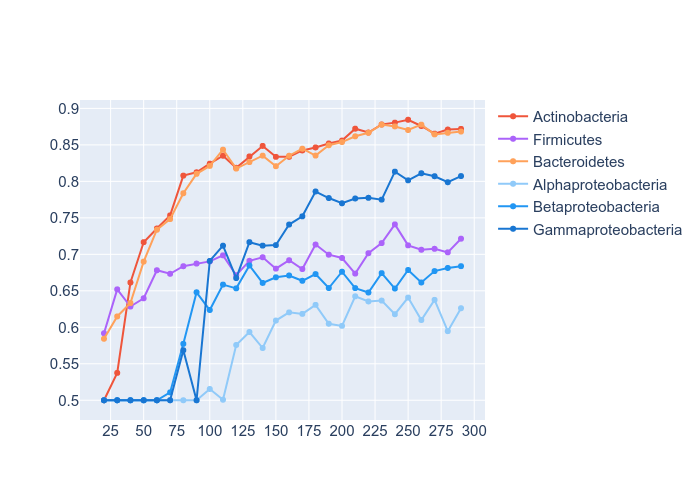

In [49]:
fig = go.Figure()
xs = sorted(list(i2gbdt))
for tax in study_tax:
    ys = []
    for size in xs:
        ys.append(np.mean(i2gbdt[size].taxaSpecM2otherTaxa[tax]))
    fig.add_trace(go.Scatter(x=xs,y=ys,mode='markers+lines',name=tax,
                            marker=dict(color=tax_map[tax])))
fig.update_layout(font_size=15,xaxis_dtick=25)
display(Image(fig.to_image()))

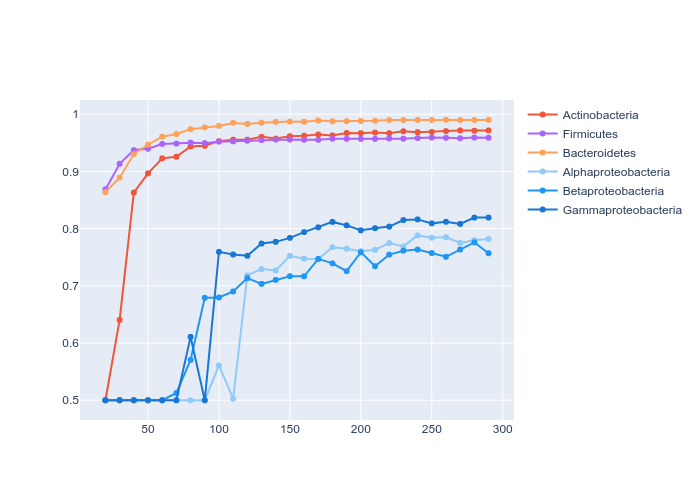

In [44]:
fig = go.Figure()
xs = sorted(list(i2gbdt))
for tax in study_tax:
    ys = []
    for size in xs:
        ys.append(np.mean(i2gbdt[size].taxaSpecM2specificTaxa[tax]))
    fig.add_trace(go.Scatter(x=xs,y=ys,mode='markers+lines',name=tax,
                            marker=dict(color=tax_map[tax])))
display(Image(fig.to_image()))

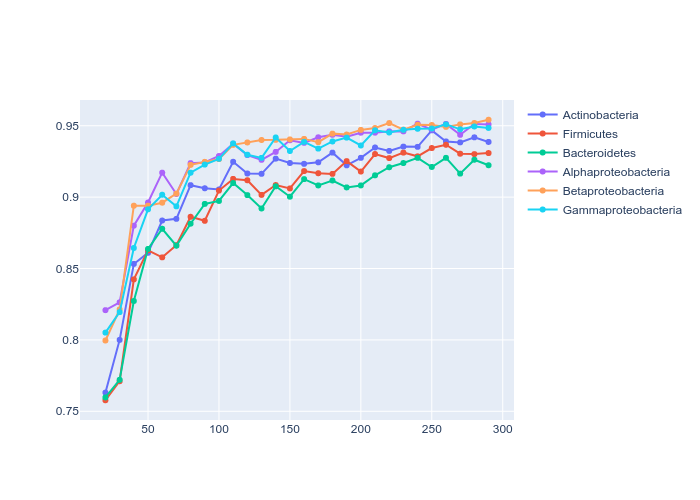

In [45]:
fig = go.Figure()
xs = sorted(list(i2gbdt))
for tax in study_tax:
    ys = []
    for size in xs:
        ys.append(np.mean(i2gbdt[size].AllTaxaM2otherTaxa[tax]))
    fig.add_trace(go.Scatter(x=xs,y=ys,mode='markers+lines',name=tax))
display(Image(fig.to_image()))

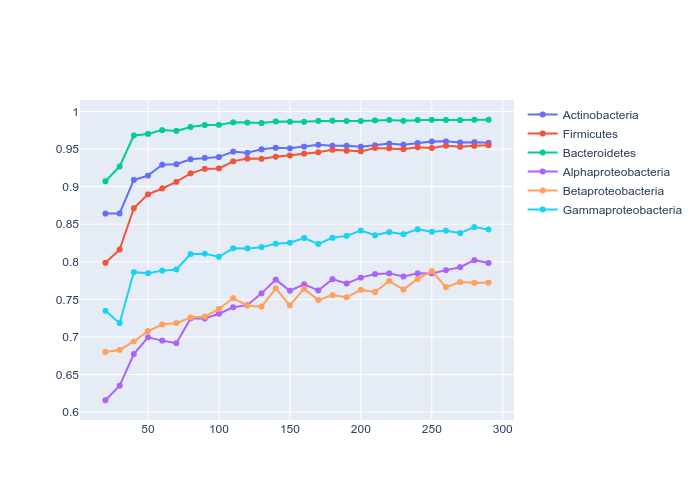

In [46]:
fig = go.Figure()
xs = sorted(list(i2gbdt))
for tax in study_tax:
    ys = []
    for size in xs:
        ys.append(np.mean(i2gbdt[size].AllTaxaM2specificTaxa[tax]))
    fig.add_trace(go.Scatter(x=xs,y=ys,mode='markers+lines',name=tax))
display(Image(fig.to_image()))

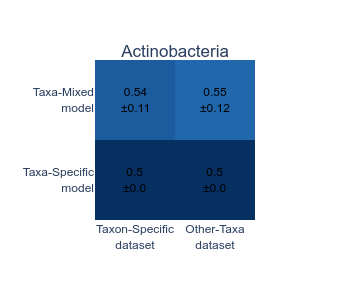

In [25]:
figs = vis_wf(i2gbdt[150])
display(Image(figs[0].to_image()))

## LR

In [ ]:
class_wf_LR = taxa_sep_workflow(reduced_data,
                                  y_bin,
                                  idx2tax,
                                  model_f= LR_m_ll,
                                  study_taxa=study_tax)
class_wf_LR.run(repeat_times=100,train_size=200,oversampling=False,return_shap=False,eval='AP')

In [57]:
assert all([len(v)==100 for v in class_wf_LR.AllTaxaM2specificTaxa.values()])
figs = vis_wf(class_wf_LR)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/LR_noOS_Six_AP.pdf')

In [ ]:
class_wf_LR_OS = taxa_sep_workflow(reduced_data,
                                  y_bin,
                                  idx2tax,
                                  model_f= LR_m_ll,
                                  study_taxa=study_tax)
class_wf_LR_OS.run(repeat_times=100,train_size=200,oversampling=True,return_shap=False)

In [127]:
assert all([len(v)==100 for v in class_wf_LR_OS.AllTaxaM2specificTaxa.values()])
figs = vis_wf(class_wf_LR_OS)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/LR_OS_Six.pdf')

In [ ]:
# class_wf_LR_top50 = taxa_sep_workflow(used_data,
#                                   y_bin,
#                                   idx2tax,
#                                   model_f= GBDT_m,
#                                   study_taxa=study_tax)
# class_wf_LR_top50.run(repeat_times=100,train_size=200,oversampling=False,return_shap=False)
                                                       

In [57]:
figs = de(class_wf_LR_top50,show=True)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/LR_noOS_Six_top50.pdf')

## RF

In [ ]:
class_wf_RF = taxa_sep_workflow(reduced_data,
                                  y_bin,
                                  idx2tax,
                                  model_f= RF_m,
                                  study_taxa=study_tax)
class_wf_RF.run(repeat_times=100,train_size=200,oversampling=False,return_shap=False)

In [129]:
figs = vis_wf(class_wf_RF)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/RF_noOS_Six.pdf')

In [ ]:
class_wf_RF_OS = taxa_sep_workflow(reduced_data,
                                  y_bin,
                                  idx2tax,
                                  model_f= RF_m,
                                  study_taxa=study_tax)
class_wf_RF_OS.run(repeat_times=100,train_size=200,oversampling=True,return_shap=False)

In [130]:
figs = vis_wf(class_wf_RF_OS)
byte_fig = out_four(figs,ofile='/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/RF_OS_Six.pdf')

##  Genomes that are frequently mispredicted

### func

In [ ]:
genome2wrong = defaultdict(list)
for _i in tqdm(range(200)):
    sssp = StratifiedShuffleSplit(n_splits=5)
    for train_index, test_index in sssp.split(reduced_data, y_bin):
        X_train_large, X_test_large = (reduced_data.iloc[train_index, :],
                                       reduced_data.iloc[test_index, :])
        y_train_large, y_test_large = y_bin[train_index], y_bin[test_index]
        pred_l, preds, model, accuracy, auc = model_def['LR'](
            X_train_large, y_train_large, X_test_large, y_test_large )    
        for p,t,idx in zip(preds,y_test_large,X_test_large.index):
            if p!=t:
                genome2wrong[idx].append(1)
            else:
                genome2wrong[idx].append(0)

In [ ]:
genome2wrong_pred_prob_general = pd.DataFrame(columns=['tax','prob'])
for tax,_d in class_wf_LR.taxaSpecM2specificTaxa_samples.items():
    for g,vs in _d.items():
        v = 1 - np.mean(vs)
        # 1- correct frequency = wrong frequency
        genome2wrong_pred_prob.loc[g,["tax",'prob']]  = [tax,v]
        

In [135]:
genome2wrong_pred_prob = pd.DataFrame(columns=['tax','prob'])
for tax,_d in class_wf_LR.taxaSpecM2specificTaxa_samples.items():
    for g,vs in _d.items():
        v = 1 - np.mean(vs)
        # 1- correct frequency = wrong frequency
        genome2wrong_pred_prob.loc[g,["tax",'prob']]  = [tax,v]
freq_wrongly_genomes1 = genome2wrong_pred_prob.index[genome2wrong_pred_prob['prob']>=0.8]
print("using LR model for six classess, # genomes", len(freq_wrongly_genomes1), " are constantly mispredicted")
print(Counter(y_bin[reduced_data.index.get_indexer(freq_wrongly_genomes1)]))

genome2wrong_pred_prob_gbdt = pd.DataFrame(columns=['tax','prob'])
for tax,_d in class_wf_GBDT.taxaSpecM2specificTaxa_samples.items():
    for g,vs in _d.items():
        v = 1 - np.mean(vs)
        # 1- correct frequency = wrong frequency
        genome2wrong_pred_prob_gbdt.loc[g,["tax",'prob']]  = [tax,v]
freq_wrongly_genomes1 = genome2wrong_pred_prob_gbdt.index[genome2wrong_pred_prob['prob']>=0.8]
print("using LR model for six classess, # genomes", len(freq_wrongly_genomes1), " are constantly mispredicted")
print(Counter(y_bin[reduced_data.index.get_indexer(freq_wrongly_genomes1)]))

sub_NCBI_df.loc[:,'prob of wrong prediction (LR)'] = genome2wrong_pred_prob.reindex(sub_NCBI_df.index)['prob']
sub_NCBI_df.loc[:,'prob of wrong prediction (GBDT)'] = genome2wrong_pred_prob_gbdt.reindex(sub_NCBI_df.index)['prob']

using LR model for six classess, # genomes 214  are constantly mispredicted
Counter({0: 177, 1: 37})
using LR model for six classess, # genomes 214  are constantly mispredicted
Counter({1: 158, 0: 56})


In [ ]:
genome2wrong_ratio = {k: (len([_ for _ in v if _==1])/len(v),len(v)) for k,v in genome2wrong.items()}

In [137]:
## further retrieve from BACDIVE
freq_wrongly_genomes =sub_NCBI_df.loc[sub_NCBI_df['prob of wrong prediction (GBDT)']>=0.8,"species"]

bacdive_ref = pd.read_csv('/mnt/ivy/thliao/project/ML_oxygen/training_sets/extra_data/bacdiv/bacdive-scrape/export_bacdive_iso_table.csv',index_col=0)
species2id = dict(zip(bacdive_ref['Species'],bacdive_ref.index))
all_species = list(bacdive_ref['Species'])
bids = []
for _ in freq_wrongly_genomes :
    if _ in all_species:
        bids.extend(list(bacdive_ref.index[bacdive_ref['Species']==_]))
print(len(freq_wrongly_genomes),
      len(set(bids))
     )

214 1160


In [142]:
bacdive_ref.index[bacdive_ref['Species']=='Kangiella aquimarina']

Int64Index([397], dtype='int64', name='ID')

In [ ]:
def get_htmldf(bid):
    all_dfs = pd.read_html("https://bacdive.dsmz.de/strain/%d" % bid)
    ls = []
    for df in all_dfs:
        try:
            ls.append(list(zip(df[1].values, df[2].values)))
        except:
            pass
    new_df = pd.DataFrame([x for x in ls for x in x])
    return new_df
species2ot = {}
for species in tqdm(freq_wrongly_genomes):
    if species in all_species:
        for bid in list(bacdive_ref.index[bacdive_ref['Species']==species]):
            ndf = get_htmldf(bid)
            d = dict(zip(ndf[0],ndf[1]))
            if 'Oxygen tolerance' in d:
                species2ot[species] = d['Oxygen tolerance']
                break
            else:
                continue
## takes 17m45s for 210 genomes                

In [103]:
sub_NCBI_df.loc[:,'Retrieved BacDiv'] = [species2ot.get(_) for _ in list(sub_NCBI_df['species'])]
tmp_df = sub_NCBI_df.reindex(columns=['metabolism','Retrieved BacDiv','prob of wrong prediction (LR)','prob of wrong prediction (GBDT)'])
tmp_df.to_excel("/home-user/thliao/project/ML_oxygen/training_sets/processed_data/NCBI_trait_added.xlsx")

---

## pdf2image

In [ ]:
from pdf2image import convert_from_path
for f in tqdm(glob('/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/taxon_related_workflow/*.pdf')):
    images = convert_from_path(f)
    a = images[0]
    name = f.replace('.pdf','.png')
    a.save(name)

In [97]:
from pdf2image import convert_from_path
for f in tqdm(glob('/mnt/ivy/thliao/project/ML_oxygen/training_sets/outputs/taxa_specific_genes/*.pdf')):
    images = convert_from_path(f)
    a = images[0]
    name = f.replace('.pdf','.png')
    a.save(name)

---

# get taxon-specific features

## Within the taxon-specific genes
1. genes that exclusively present in the phylum firmicutes
    pearsonr larger than 0.4  (Genes broadly present in the specific phylum only and strongly associated with the oxygen requirement)
2. For the genes that not exclusively present 

In [207]:
def get_tax2finaldf(workflow):
    def _get_ratio_df(fea2shap):
        df = pd.DataFrame.from_dict(fea2shap,orient='index')
        ratio_df = df/df.sum()*100
        return ratio_df
    def _get_mean_df(fea2shap):
        df = pd.DataFrame.from_dict(fea2shap,orient='index')
        return df
    
    taxon2df_specific = {}
    taxon2df_other = {}
    for taxon,shap_d in workflow.SHAP_taxaSpecM2specificTaxa.items():
        another_d = workflow.SHAP_taxaSpecM2otherTaxa[taxon]
        taxon2df_specific[taxon] = pd.concat([_get_ratio_df(d) for d in shap_d],axis=1).mean(1).sort_values()
        taxon2df_other[taxon] = pd.concat([_get_ratio_df(d) for d in another_d],axis=1).mean(1).sort_values()
    
    final_tax2df = {}
    for taxon in taxon2df_specific:
        series1 = taxon2df_specific[taxon]; series2 = taxon2df_other[taxon]
        df = pd.DataFrame(columns=['taxon2taxon_specific','taxon2others'],index=series1.index)
        df.loc[series1.index,'taxon2taxon_specific'] = series1
        df.loc[series2.index,'taxon2others'] = series2
        list_ratios1 = workflow.DIRE_taxaSpecM2otherTaxa[taxon]
        list_ratios2 = workflow.DIRE_taxaSpecM2specificTaxa[taxon]
        r_df1 = pd.concat([_get_mean_df(d) for d in list_ratios1],axis=1).mean(1).sort_values()
        r_df2 = pd.concat([_get_mean_df(d) for d in list_ratios2],axis=1).mean(1).sort_values()
        df.loc[r_df1.index,'taxon2taxon_specific ratio of positive corr'] = [1 if _>=50 else -1 for _ in r_df1.values]
        df.loc[r_df2.index,'taxon2others ratio of positive corr'] = [1 if _>=50 else -1 for _ in r_df2.values]
        final_tax2df[taxon] = df
    return final_tax2df

def output_taxon2specific_genes(final_tax2df,ofile=None):
    taxon2specific_genes = {}
    for taxon,eachdf in final_tax2df.items():
        #eachdf = eachdf.sort_values('taxon2taxon_specific',ascending=False)
        eachdf.loc[:,'S1'] = eachdf['taxon2taxon_specific'] * np.array([-1 if _ <0 else 1 for _ in eachdf['tax2spec pearson coef']])
        eachdf.loc[:,'S2'] = eachdf['taxon2others'] * np.array([-1 if _ <0 else 1 for _ in eachdf['tax2other pearson coef']])
        eachdf.loc[:,'dist'] = abs(eachdf['S2']-eachdf['S1'])
        eachdf = eachdf.sort_values('dist',ascending=False)
        ko1 = eachdf.index[:100]
        ko2 = eachdf.index[eachdf['taxon2taxon_specific']>=np.percentile(eachdf['taxon2taxon_specific'],99)]
        eachdf = eachdf.loc[set(ko2).intersection(set(ko1)),:]
        eachdf = eachdf.sort_values('dist',ascending=False)
        #print(taxon,eachdf.shape[0])
        taxon2specific_genes[taxon] = eachdf  

    if ofile is not None:
        writer = pd.ExcelWriter(ofile,
                                engine='xlsxwriter')
        for taxon,eachdf in taxon2specific_genes.items():
            eachdf.to_excel(writer, sheet_name=taxon)
        writer.close()
    return taxon2specific_genes

In [175]:
final_tax2df = get_tax2finaldf(class_wf_GBDT)

In [182]:
pearsonr_data_six = {}
data = class_wf_GBDT.get_data()
for tax in class_wf_GBDT.study_taxa:
    eachdf = pd.DataFrame(index=data.columns[:-2])
    tax2spec_c = []
    tax2spec_p = []
    tax2other_c = []
    tax2other_p = []
    for gene in tqdm(data.columns[:-2]):
        coef_1,p_1 = pearsonr(data.loc[data['tax']==tax,'label'],data.loc[data['tax']==tax,gene])
        coef_2,p_2 = pearsonr(data.loc[data['tax']!=tax,'label'],data.loc[data['tax']!=tax,gene])
        tax2spec_c.append(coef_1)
        tax2spec_p.append(p_1)
        tax2other_c.append(coef_2)
        tax2other_p.append(p_2)
    eachdf.loc[:,'tax2spec pearson coef'] = tax2spec_c
    eachdf.loc[:,'tax2spec pearson pvalue'] = tax2spec_p
    eachdf.loc[:,'tax2other pearson coef'] = tax2other_c
    eachdf.loc[:,'tax2other pearson pvalue'] = tax2other_p
    pearsonr_data_six[tax] = eachdf

In [183]:
for tax,eachdf in final_tax2df.items():
    pearsonr_data = pearsonr_data_six[tax]
    for c in pearsonr_data.columns:
        eachdf.loc[:,c] = pearsonr_data[c]

In [208]:
taxon2summary = output_taxon2specific_genes(final_tax2df)

In [ ]:
eachdf = final_tax2df['Firmicutes'].sort_values('dist',ascending=False)
fig = go.Figure()
fig.add_box(x=eachdf.index,y=eachdf['S1'] ,name='2specific')
fig.add_box(x=eachdf.index,y=eachdf['S2'] ,name='2others')
fig.layout.height = 400
fig.layout.width = 900
# fig.layout.xaxis.range = []
# fig.show()
display(Image(fig.to_image()))

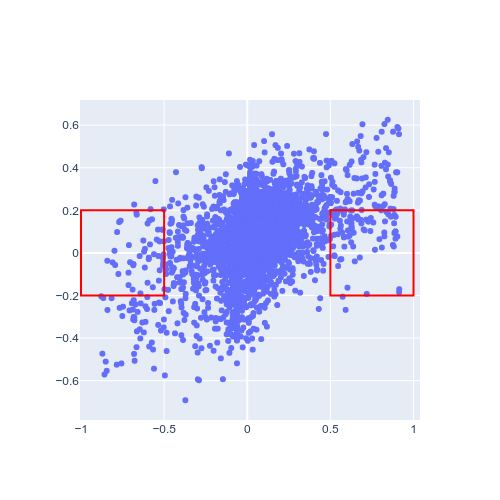

In [235]:
_d = pearsonr_data_six['Bacteroidetes']
fig = go.Figure()
fig.add_scatter(x=_d['tax2spec pearson coef'],text=list(_d.index),
                y=_d['tax2other pearson coef'],mode='markers')
fig.layout.width = 500
fig.layout.height = 500

fig.add_shape(type="rect",
    x0=0.5, y0=-0.2, x1=1, y1=0.2,
    line=dict(color="#ff0000"),)

fig.add_shape(type="rect",
    x0=-0.5, y0=-0.2, x1=-1, y1=0.2,
    line=dict(color="#ff0000"),)
display(Image(fig.to_image()))


100
89


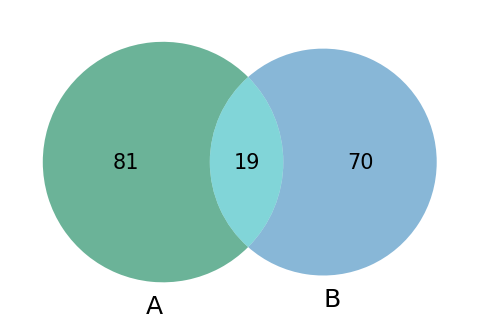

In [116]:
# ko1 = eachdf.index[:100]
# print(len(ko1))
# ko2 = eachdf.index[eachdf['taxon2taxon_specific']>=np.percentile(eachdf['taxon2taxon_specific'],99)]
# print(len(ko2))

# from matplotlib_venn import venn2
# import matplotlib.pyplot as plt
# my_dpi=150
# plt.figure(figsize=(580/my_dpi, 580/my_dpi), dpi=my_dpi)#控制图尺寸的同时，使图高分辨率（高清）显示
# g=venn2(subsets = [set(ko1),set(ko2)], #绘图数据集
#         #set_labels = ('2specific', '2others'), #设置组名
#         set_colors=("#098154","#3987bd"),#设置圈的颜色，中间颜色不能修改
#         alpha=0.6,#透明度
#         normalize_to=1.0,#venn图占据figure的比例，1.0为占满
#        )
# plt.show()

## examine the performance of these genes

### overall model

In [123]:
## test the performance of taxon-specific model
overall2performance = {}
_tmp = reduced_data.copy()
_tmp.loc[:,'label'] = y_bin
for taxon,genes in tqdm(taxon2specific_genes.items()):
    _t = prevalent_tax[::]
    _t.remove(taxon)
    tax_specific_data = _tmp.loc[Full_phy_array==taxon,genes+['label']]
    other_taxa_data = _tmp.loc[np.isin(Full_phy_array,_t),genes+['label']]
    
    overall2all = []
    overall2spec = []
    sssp = StratifiedShuffleSplit(n_splits=5)
    for train_index, test_index in sssp.split(other_taxa_data.iloc[:,:-1],other_taxa_data['label']): 
        train_X, test_X = other_taxa_data.iloc[train_index, :-1], other_taxa_data.iloc[test_index, :-1]
        train_y, test_y = other_taxa_data.iloc[train_index, -1], other_taxa_data.iloc[test_index, -1]
        
        y_pred,y_pred_label,model,accuracy,auc = RF_m(train_X, train_y,
                                                      test_X, test_y)
        overall2all.append(accuracy)
        y_pred_label = model.predict(tax_specific_data.iloc[:,:-1])
        accuracy = metrics.balanced_accuracy_score(tax_specific_data.iloc[:,-1], y_pred_label)
        overall2spec.append(accuracy)
    overall2performance[taxon] = [overall2all,overall2spec]

100%|██████████| 4/4 [00:16<00:00,  4.16s/it]


In [ ]:
for t,(overall,spec) in overall2performance.items():
    fig = go.Figure()
    fig.add_box(x=['specific']*len(spec),y=spec,showlegend=False)
    fig.add_box(x=['overall']*len(overall),y=other,showlegend=False)
    fig.update_layout(
        height = 350,
        width = 450,
        template='simple_white',
    title={
        'text': t,
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#     fig.layout.height = 350
#     fig.layout.width = 450
#     fig.layout.template='simple_white'
    fig.show()

### taxon-specific model

In [106]:
## test the performance of taxon-specific model
taxon2performance = {}
_tmp = reduced_data.copy()
_tmp.loc[:,'label'] = y_bin
for taxon,genes in tqdm(taxon2specific_genes.items()):
    _t = prevalent_tax[::]
    _t.remove(taxon)
    tax_specific_data = _tmp.loc[Full_phy_array==taxon,genes+['label']]
    other_taxa_data = _tmp.loc[np.isin(Full_phy_array,_t),genes+['label']]
    
    per2spec = []
    per2other = []
    sssp = StratifiedShuffleSplit(n_splits=5)
    for train_index, test_index in sssp.split(tax_specific_data.iloc[:,:-1],tax_specific_data['label']): 
        train_X, test_X = tax_specific_data.iloc[train_index, :-1], tax_specific_data.iloc[test_index, :-1]
        train_y, test_y = tax_specific_data.iloc[train_index, -1], tax_specific_data.iloc[test_index, -1]
        y_pred,y_pred_label,model,accuracy,auc = RF_m(train_X, train_y,
                                                      test_X, test_y)
        per2spec.append(accuracy)
        y_pred_label = model.predict(other_taxa_data.iloc[:,:-1])
        accuracy = metrics.balanced_accuracy_score(other_taxa_data.iloc[:,-1], y_pred_label)
        per2other.append(accuracy)
    taxon2performance[taxon] = [per2spec,per2other]

In [ ]:
for t,(spec,other) in taxon2performance.items():
    fig = go.Figure()
    fig.add_box(x=['specific']*len(spec),y=spec,showlegend=False)
    fig.add_box(x=['predict other']*len(spec),y=other,showlegend=False)
    fig.update_layout(
        height = 350,
        width = 450,
        template='simple_white',
    title={
        'text': t,
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#     fig.layout.height = 350
#     fig.layout.width = 450
#     fig.layout.template='simple_white'
    fig.show()

In [ ]:
gene = 'K11144'
taxa = 'Firmicutes'

g1 = (reduced_data.loc[:,gene]==1) & (Full_phy_array==taxa)
g0 = (reduced_data.loc[:,gene]==0) & (Full_phy_array==taxa)

s11 = sum(g1 & (y_bin==1 & (Full_phy_array==taxa)))
s10 = sum(g1 & (y_bin==0 & (Full_phy_array==taxa)))
s01 = sum(g0 & (y_bin==1 & (Full_phy_array==taxa)))
s00 = sum(g0 & (y_bin==0 & (Full_phy_array==taxa)))

z = [[s11, s10],
     [s01, s00]]
x = ['Aerobe', 'Anaerobe']
y = ['Presence', "Absence"]
_f = ff.create_annotated_heatmap(z, font_colors=['#000000'])
fig = px.imshow(z,
                x=x,
                y=y,
                color_continuous_scale='Blues',
                range_color=[0, np.mean(z[0]+z[1])],)
# disable the colorbar
fig.update(layout_coloraxis_showscale=False)
fig.layout.annotations = _f.layout.annotations
fig.layout.title = taxon
fig.layout.title.x = 0.5
fig.layout.height = 300
fig.layout.width = 350
img_bytes = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes, format='png'))


In [ ]:

g1 = (reduced_data.loc[:,gene]==1) & (Full_phy_array!=taxa)
g0 = (reduced_data.loc[:,gene]==0) & (Full_phy_array!=taxa)

s11 = sum(g1 & (y_bin==1 & (Full_phy_array!=taxa)))
s10 = sum(g1 & (y_bin==0 & (Full_phy_array!=taxa)))
s01 = sum(g0 & (y_bin==1 & (Full_phy_array!=taxa)))
s00 = sum(g0 & (y_bin==0 & (Full_phy_array!=taxa)))

z = [[s11, s10],
     [s01, s00]]
x = ['Aerobe', 'Anaerobe']
y = ['Presence', "Absence"]
_f = ff.create_annotated_heatmap(z, font_colors=['#000000'])
fig = px.imshow(z,
                x=x,
                y=y,
                color_continuous_scale='Blues',
                range_color=[0, np.mean(z[0]+z[1])],)
# disable the colorbar
fig.update(layout_coloraxis_showscale=False)
fig.layout.annotations = _f.layout.annotations
fig.layout.title = taxon
fig.layout.title.x = 0.5
fig.layout.height = 300
fig.layout.width = 350
img_bytes = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes, format='png'))


In [245]:
from statsmodels.stats.multitest import multipletests

prevalent_tax = ['Proteobacteria','Actinobacteria','Firmicutes','Bacteroidetes']
tax2genes = {}
for tax,sig_ko2coef in tax2sig_kos.items():
    specific_kos = [k for k,v in sig_ko2coef.items() if v >0]
    f_df = pd.read_excel('/mnt/ivy/thliao/project/ML_oxygen/outputs/taxa_specific_genes/taxon_specific_genes.xlsx',
                        sheet_name=tax,header=0,index_col=0)
    remaining_kos = set(f_df.index).difference(specific_kos)
    # kos that not specific present in the designated phylum and even not present in this phylum
    sub_df = f_df.reindex(set(f_df.index).intersection(set(remaining_kos))).sort_values('Specificity',ascending=False)
    sub_df = sub_df.loc[sub_df['taxon2taxon_sepcific pearson'] * sub_df['taxon2others pearson'] <0,:]
    sub_df = sub_df.sort_values('taxon2taxon_sepcific pearson')
    a1 = ((sub_df['taxon2taxon_sepcific pearson'].abs()>=0.4) & (sub_df['taxon2taxon_sepcific pearsonr qvalue']<=0.05))
    a2 = ((sub_df['taxon2others pearson'].abs()>=0.4)&(sub_df['taxon2others pearsonr qvalue']<=0.05))
    final_df = sub_df.loc[a1|a2]
    print(tax,final_df.shape[0])
    tax2genes[tax] = final_df

Proteobacteria 23
Actinobacteria 7
Firmicutes 14
Bacteroidetes 5


In [237]:
writer = pd.ExcelWriter('/mnt/ivy/thliao/project/ML_oxygen/outputs/taxa_specific_genes/taxon_specific_prevalent_genes.xlsx',
                        engine='xlsxwriter')
for taxon,_df in tax2genes.items():
    _df.to_excel(writer, sheet_name=taxon)
writer.close()

In [157]:
from statsmodels.stats.multitest import multipletests

prevalent_tax = ['Proteobacteria','Actinobacteria','Firmicutes','Bacteroidetes']
for tax in prevalent_tax:
    f_df = pd.read_excel('/mnt/ivy/thliao/project/ML_oxygen/outputs/taxa_specific_genes/taxon_specific_genes.xlsx',
                        sheet_name=tax,header=0,index_col=0)
#     if tax == 'Firmicutes':
#         f_df = pd.read_excel('/mnt/ivy/thliao/project/ML_oxygen/outputs/taxa_specific_genes/taxon_specific_genes.xlsx',
#                         sheet_name=tax,header=1,index_col=0)
    a1 = ((f_df['taxon2taxon_sepcific pearson'].abs()>=0.4) & (f_df['taxon2taxon_sepcific pearsonr qvalue']<=0.05))
    a2 = ((f_df['taxon2others pearson'].abs()>=0.4)&(f_df['taxon2others pearsonr qvalue']<=0.05))
    final_df = f_df.loc[a1|a2].sort_values('taxon2taxon_specific',ascending=False)
    print(tax,final_df.shape[0])

Proteobacteria 377
Actinobacteria 207
Firmicutes 418
Bacteroidetes 138


In [ ]:
f_df2 = pd.read_excel('/mnt/ivy/thliao/project/ML_oxygen/outputs/taxa_specific_genes/taxon_specific_exclusively_present_genes.xlsx',sheet_name=tax,index_col=0)
f_df2

In [ ]:
_df = pd.read_excel('/mnt/ivy/thliao/project/ML_oxygen/outputs/taxa_specific_genes/taxon_specific_prevalent_genes.xlsx',
                    sheet_name='Actinobacteria',
                    index_col=0)
_df

In [ ]:
fig = go.Figure()
fig.add_box(x=['target_phylum']*len(specific_gids),
           y=[target_ko_v[_] for _ in specific_gids])
fig.add_box(x=['others']*len(other_gids),
           y=[target_ko_v[_] for _ in other_gids])
fig.show()

# old part

In [29]:
from bin.other_convertor.classify_kos import *
writer = pd.ExcelWriter('/mnt/ivy/thliao/project/ML_oxygen/training_sets/outputs/taxa_specific_genes/taxon_specific_genes.xlsx',
                        engine='xlsxwriter')
tax2final_df = {}
for taxon,shap_other_df in taxon2df_others.items():
    shap_taxon_df = taxon2df_specific[taxon]
    
    idx = set(shap_other_df.index).intersection(set(shap_taxon_df.index))
    df = pd.DataFrame(index=idx)
    
    df.loc[:,'taxon2taxon_specific'] = shap_taxon_df.reindex(idx)['imp ratio (mean)']
    df.loc[:,'taxon2others'] = shap_other_df.reindex(idx)['imp ratio (mean)']
    df.loc[:,'Specificity'] = shap_taxon_df.reindex(idx)['imp ratio (mean)'] - shap_other_df.reindex(idx)['imp ratio (mean)']
    df.loc[:,'taxon2taxon_sepcific pearson'] = shap_taxon_df.reindex(idx)['pearsonr']
    df.loc[:,'taxon2others pearson'] = shap_other_df.reindex(idx)['pearsonr']
    df.loc[:,'taxon2taxon_sepcific pearsonr qvalue'] = shap_taxon_df.reindex(idx)['q value']
    df.loc[:,'taxon2others pearsonr qvalue'] = shap_other_df.reindex(idx)['q value']
    ko_des = get_ko_infos(idx)
    df.loc[:,'description'] = [ko_des.get(ko,'') for ko in df.index]
    df = df.sort_values('taxon2taxon_sepcific pearson',ascending=False)
    #df = df.loc[(df['taxon2taxon_sepcific pearsonr qvalue']<=0.05)|(df['taxon2others pearsonr qvalue']<=0.05),:]
    print(taxon,df.shape[0])
    df.to_excel(writer, sheet_name=taxon)
    tax2final_df[taxon] = df
writer.close()

Proteobacteria 4707
Actinobacteria 3080
Firmicutes 3243
Bacteroidetes 2295


In [18]:
tax2final_df = pd.read_excel('/mnt/ivy/thliao/project/ML_oxygen/training_sets/outputs/taxa_specific_genes/taxon_specific_genes.xlsx',sheet_name=None,index_col=0)

---

In [11]:
from load_vis_data import _draw_df

In [ ]:
import plotly.express as px
ko = 'K20608'
draw_df = _draw_df.copy().reindex(bac_ids)
cs = []
for idx,row in draw_df.iterrows():
    p = genome2tax[idx.split('.')[0]]['phylum'] 
    ko_w = X.loc[idx,ko]
    if ko_w == 1 and p == 'Bacteroidetes':
        cs.append(f'Bacteroidetes with {ko}')
    elif ko_w == 1 and p != 'Bacteroidetes':
        cs.append(f'others with {ko}')
    elif ko_w != 1 and p == 'Bacteroidetes':
        cs.append(f'Bacteroidetes without {ko}')
    else:
        cs.append(f'others without {ko}')
draw_df.loc[:,'C'] = cs
fig = px.scatter(
    draw_df,
    x=0,
    y=1,
    color="C",
    # opacity=0.8,
    #hover_name="show_text",
    #color_discrete_map={} if color_map is None else color_map,
)
fig.layout.height = 600
fig.layout.width = 800
# fig.layout.template = 'simple_white'
# fig.show()
img_bytes1 = fig.to_image(format="png", engine="kaleido")
display(Image(img_bytes1))